In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%store -r main_data

In [3]:
%store -r store_data

In [4]:
complete_month=main_data.drop_duplicates(subset=['Month of Sale'])['Month of Sale'].tolist()
del complete_month[7:]
complete_month.sort()
annualized=main_data[main_data['Month of Sale'].isin(complete_month)]


In [5]:
year1_data=main_data[main_data['Year of Sale']==2013]
year2_data=main_data[main_data['Year of Sale']==2014]
year3_data=main_data[main_data['Year of Sale']==2015]

**Contents of this notebook**

**1.[Problem Statement](#problem)**

**2.[Overview of Sales and Customer walkins](#overview)**

**3.[Stores with Negative growth](#neg)**

**4.[Analysis of Seasonality](#season)**

**5.[State Holidays-EDA](#Sthol)**

**6.[School Holidays-EDA](#Schhol)**

**7.[Single Day Promotions-EDA](#Promo1)**

**8.[Month Long Promotions-EDA](#Promo2)**




**Problem Statement-RossMann Stores**
<a id='problem'></a>

**In response to a decline in Customer walk-ins at it’s stores, can Rossmann identify specific stores that are contributing to this, and develop strategies to increase it’s revenue by 5% by the end of 2015?**

*Rossmann Inc is a retail chain of drug stores operating cross Europe. Rossmann has had a 2% year on year increase in its Sales between 2013 and 2014. The trends for 2015 are promising a 3% growth. Rossmann operates in the health and beauty industry, which is projected to grow @2.6% .The industry has been expanding along with Rossmann, with close to 17% of it’s competitive stores opening up in the last three years. There was a marginal increase of 1% in customer walk ins between 2013 and 2014. This has declined to a negative figure in 2015. This is worrisome and could impact Rossmann’s long term sales trajectory.*




**Overview of Sales and Customer walk-ins**
<a id='overview'></a>

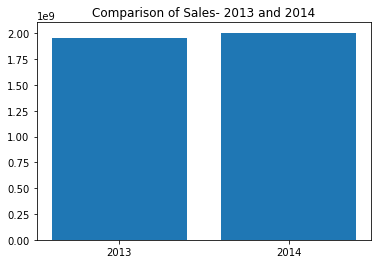

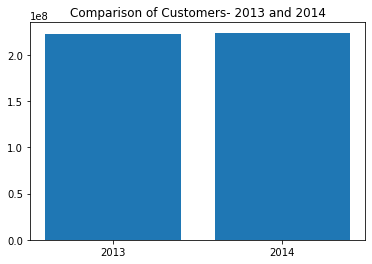

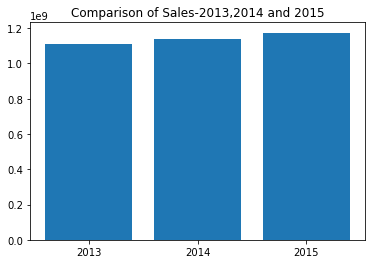

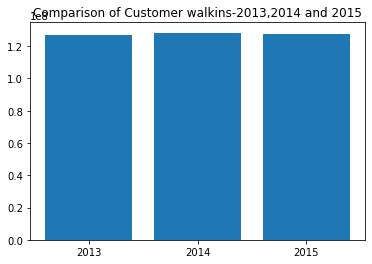

In [6]:
year_wise_sales=main_data.groupby('Year of Sale')['Sales'].agg(['sum']).reset_index()
year_wise_sales.columns=['Year','Total Sales']
year_wise_customers=main_data.groupby('Year of Sale')['Customers'].agg(['sum']).reset_index()
year_wise_customers.columns=['Year','Total Customers']
sales_labels=main_data.groupby(['Year of Sale'])['Sales'].sum()
customers_labels=main_data.groupby(['Year of Sale'])['Customers'].sum()
plt.bar(year_wise_sales[year_wise_sales['Year'].isin([2013,2014])]['Year'],year_wise_sales[year_wise_sales['Year'].isin([2013,2014])]['Total Sales'],tick_label=['2013','2014'])
plt.title('Comparison of Sales- 2013 and 2014')
plt.show()
plt.bar(year_wise_customers[year_wise_customers['Year'].isin([2013,2014])]['Year'],year_wise_customers[year_wise_customers['Year'].isin([2013,2014])]['Total Customers'],tick_label=['2013','2014'])
plt.title('Comparison of Customers- 2013 and 2014')
plt.show()

a_year_wise_sales=annualized.groupby('Year of Sale')['Sales'].agg(['sum']).reset_index()
a_year_wise_sales.columns=['Year','Total Sales']
a_year_wise_customers=annualized.groupby('Year of Sale')['Customers'].agg(['sum']).reset_index()
a_year_wise_customers.columns=['Year','Total Customers']
sales_labels=main_data.groupby(['Year of Sale'])['Sales'].sum()
customers_labels=main_data.groupby(['Year of Sale'])['Customers'].sum()
plt.bar(a_year_wise_sales['Year'],a_year_wise_sales['Total Sales'],tick_label=['2013','2014','2015'])
plt.title('Comparison of Sales-2013,2014 and 2015')
plt.show()
plt.bar(a_year_wise_customers['Year'],a_year_wise_customers['Total Customers'],tick_label=['2013','2014','2015'])
plt.title('Comparison of Customer walkins-2013,2014 and 2015')
plt.show()

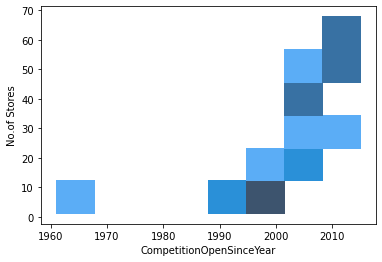

In [7]:
yearcomp=pd.DataFrame(store_data[store_data['CompetitionOpenSinceYear']!=0].groupby('CompetitionOpenSinceYear')['Store'].count()).reset_index()
sns.histplot(x='CompetitionOpenSinceYear',y='Store',data=yearcomp)
plt.ylabel('No.of Stores')
plt.show()

**On the basis of the information available to us on the Store type and assortment, we have created 9 unique store categories. 'AA' stores constitute nearly 1/3rd of the total no. of stores in this dataset**

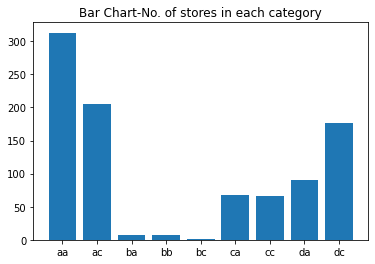

In [8]:
store_categories=main_data.drop_duplicates(subset=['StoreType+Assortment'])['StoreType+Assortment'].tolist()
number_stores=store_data.groupby('StoreType+Assortment')['Store'].agg(['count']).reset_index()
plt.bar(number_stores['StoreType+Assortment'],number_stores['count'])
plt.title('Bar Chart-No. of stores in each category')
plt.show()

**Although A type stores (AA and AC) generate the highest  Total Sales and Customer walk-ins, Type B stores(BA, BB and BC) stores generate the highest Average Sales and Customer walkins**

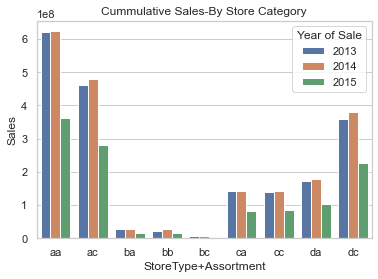

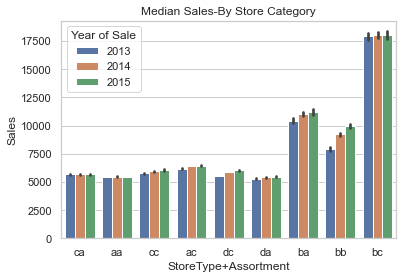

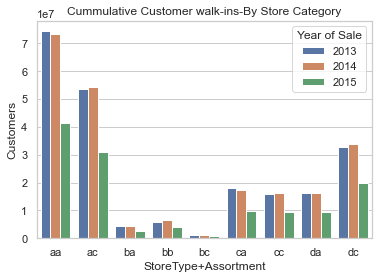

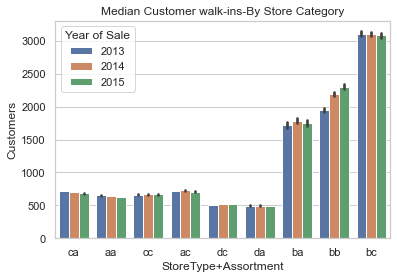

In [9]:
sales_cat=main_data.groupby(['StoreType+Assortment','Year of Sale'])['Sales'].sum().reset_index()
cust_cat=main_data.groupby(['StoreType+Assortment','Year of Sale'])['Customers'].sum().reset_index()

sns.set_theme(style="whitegrid")
sns.barplot(data=sales_cat,x="StoreType+Assortment", y="Sales", hue="Year of Sale")
plt.title('Cummulative Sales-By Store Category')
plt.show()

sns.set_theme(style="whitegrid")
sns.barplot(data=main_data,x="StoreType+Assortment", y="Sales", hue="Year of Sale")
plt.title('Median Sales-By Store Category')
plt.show()

sns.set_theme(style="whitegrid")
sns.barplot(data=cust_cat,x="StoreType+Assortment", y="Customers", hue="Year of Sale")
plt.title('Cummulative Customer walk-ins-By Store Category')
plt.show()

sns.set_theme(style="whitegrid")
sns.barplot(data=main_data,x="StoreType+Assortment", y="Customers", hue="Year of Sale")
plt.title('Median Customer walk-ins-By Store Category')
plt.show()


**The least growth in sales between 2014 and 2015 can be seen in Category AA. This is also the category with the highest median negative growth in Customer walkins between 2014 and 2015**

**Category BB returned the highest growth in Customer walkins and Sales between 2014 and 2015**

In [10]:
def percentage_change(col1,col2):
    return ((col2-col1)/col1)*100
store_data['Difference in Sales-2013 and 2014']=percentage_change(store_data['2013-Sales'],store_data['2014-Sales'])
store_data['Difference in Sales-2014 and 2015']=percentage_change(store_data['2014-Sales'],store_data['2015-Sales'])
store_data['Difference in Customers-2013 and 2014']=percentage_change(store_data['2013-Customers'],store_data['2014-Customers'])
store_data['Difference in Customers-2014 and 2015']=percentage_change(store_data['2014-Customers'],store_data['2015-Customers'])


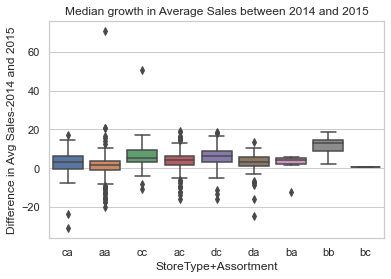

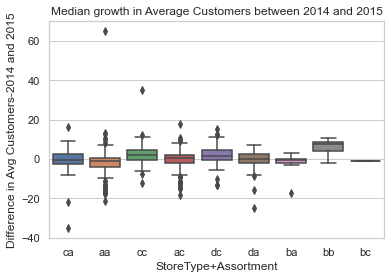

In [11]:
annul_store_avg_2013=year1_data[year1_data['Month of Sale'].isin(complete_month)].groupby('Store')['Sales'].agg(['mean']).reset_index()
annul_store_avg_2014=year2_data[year2_data['Month of Sale'].isin(complete_month)].groupby('Store')['Sales'].agg(['mean']).reset_index()
annul_store_avg_2015=year3_data[year3_data['Month of Sale'].isin(complete_month)].groupby('Store')['Sales'].agg(['mean']).reset_index()
annul_store_avg_2013_cust=year1_data[year1_data['Month of Sale'].isin(complete_month)].groupby('Store')['Customers'].agg(['mean']).reset_index()
annul_store_avg_2014_cust=year2_data[year2_data['Month of Sale'].isin(complete_month)].groupby('Store')['Customers'].agg(['mean']).reset_index()
annul_store_avg_2015_cust=year3_data[year3_data['Month of Sale'].isin(complete_month)].groupby('Store')['Customers'].agg(['mean']).reset_index()
annul_store_avg_2013=annul_store_avg_2013.merge(annul_store_avg_2013_cust,on='Store',how='left')
annul_store_avg_2014=annul_store_avg_2014.merge(annul_store_avg_2014_cust,on='Store',how='left')
annul_store_avg_2015=annul_store_avg_2015.merge(annul_store_avg_2015_cust,on='Store',how='left')
annul_store_avg_2013.columns=['Store','Average Sales for the first seven months of 2013','Average Customer walkins for the first seven months of 2013']
annul_store_avg_2014.columns=['Store','Average Sales for the first seven months of 2014','Average Customer walkins for the first seven months of 2014']
annul_store_avg_2015.columns=['Store','Average Sales for the first seven months of 2015','Average Customer walkins for the first seven months of 2015']
average_store_data=annul_store_avg_2013.merge(annul_store_avg_2014,on='Store',how='left')
average_store_data=average_store_data.merge(annul_store_avg_2015,on='Store',how='left')
average_store_data['Difference in Avg Sales-2013 and 2014']=percentage_change(average_store_data['Average Sales for the first seven months of 2013'],average_store_data['Average Sales for the first seven months of 2014'])
average_store_data['Difference in Avg Sales-2014 and 2015']=percentage_change(average_store_data['Average Sales for the first seven months of 2014'],average_store_data['Average Sales for the first seven months of 2015'])
average_store_data['Difference in Avg Customers-2013 and 2014']=percentage_change(average_store_data['Average Customer walkins for the first seven months of 2013'],average_store_data['Average Customer walkins for the first seven months of 2014'])
average_store_data['Difference in Avg Customers-2014 and 2015']=percentage_change(average_store_data['Average Customer walkins for the first seven months of 2014'],average_store_data['Average Customer walkins for the first seven months of 2015'])
average_store_data['StoreType+Assortment']=store_data['StoreType+Assortment']

sns.boxplot(y='Difference in Avg Sales-2014 and 2015',x='StoreType+Assortment',data=average_store_data)
plt.title('Median growth in Average Sales between 2014 and 2015')
plt.show()

sns.boxplot(y='Difference in Avg Customers-2014 and 2015',x='StoreType+Assortment',data=average_store_data)
plt.title('Median growth in Average Customers between 2014 and 2015')
plt.show()




**Stores returning negative growth between 2014 and 2015**
<a id='neg'></a>

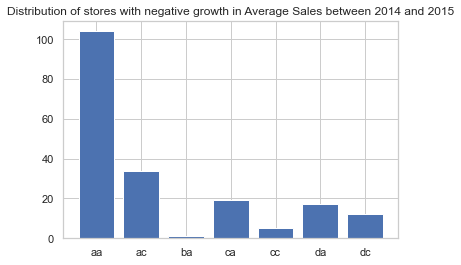

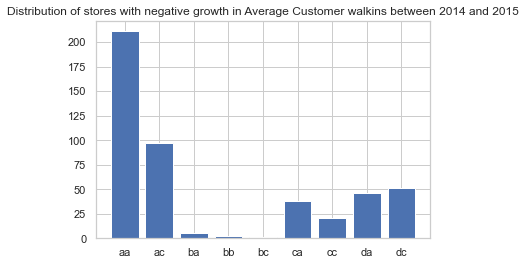

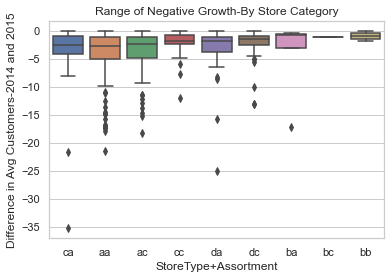

In [12]:
#Stores with negative growth in average sales between 2014 and 2015
neg_sales_3=average_store_data[average_store_data['Difference in Avg Sales-2014 and 2015']<0]
neg4=neg_sales_3.groupby('StoreType+Assortment')['Store'].agg(['count']).reset_index()
plt.bar(neg4['StoreType+Assortment'],neg4['count'])
plt.title('Distribution of stores with negative growth in Average Sales between 2014 and 2015')
plt.show()

#Stores with negative growth in average customer walkins between 2014 and 2015
neg_customers_4=average_store_data[average_store_data['Difference in Avg Customers-2014 and 2015']<0]
neg6=neg_customers_4.groupby('StoreType+Assortment')['Store'].agg(['count']).reset_index()
plt.bar(neg6['StoreType+Assortment'],neg6['count'])
plt.title('Distribution of stores with negative growth in Average Customer walkins between 2014 and 2015')
plt.show()

sns.boxplot(y='Difference in Avg Customers-2014 and 2015',x='StoreType+Assortment',data=neg_customers_4)
plt.title('Range of Negative Growth-By Store Category')
plt.show()


**Out of the 935 stores that are in the scope of our analysis, 472 stores have returned negative growth in customer walk-ins between 2014 and 2015-50% of these stores are AA Stores. Also, these stores return the highest decline in growth amongst all categories**-*This is on the basis of the the first seven months in 2014 Vs the first seven months in 2015*

**Analysis of Seasonality**

<a id='season'></a>

**The graph indicates that there is a dip in sales in the month of February and a surge towards the end of the year across all years.**

**Seasonality is the same for all categories**


**Overall Seasonality**

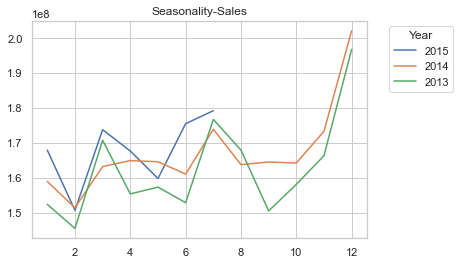

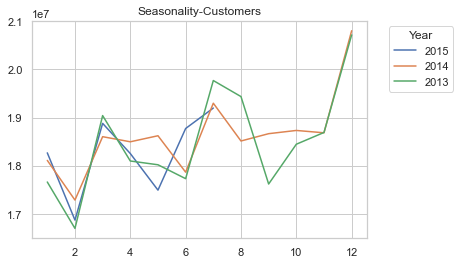

In [13]:
year_list=main_data.drop_duplicates(subset=['Year of Sale'])['Year of Sale'].tolist()
for y in year_list:
    line_data=main_data[main_data['Year of Sale']==y].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    plt.plot(line_data['Month of Sale'],line_data['sum'])
plt.title('Seasonality-Sales')
plt.legend(year_list,title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
for y in year_list:
    line1_data=main_data[main_data['Year of Sale']==y].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    plt.plot(line1_data['Month of Sale'],line1_data['sum'])
plt.title('Seasonality-Customers')
plt.legend(year_list,title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
    



**Seasonality by Store Category**

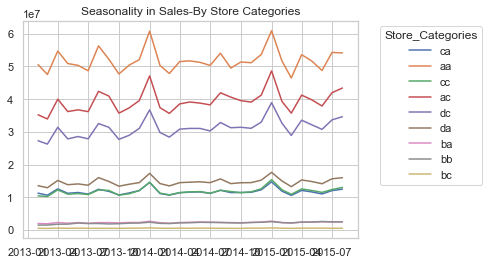

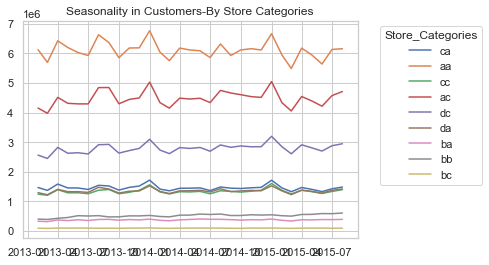

In [14]:
store_categories=main_data.drop_duplicates(subset=['StoreType+Assortment'])['StoreType+Assortment'].tolist()
for cat in store_categories:
    time_group=pd.DataFrame(main_data[main_data['StoreType+Assortment']==cat].groupby(pd.Grouper(key='Date',freq='M'))['Sales'].sum()).reset_index()
    time_group.columns=['M/Y','Total Sales']
    plt.plot(time_group['M/Y'],time_group['Total Sales'])
plt.title('Seasonality in Sales-By Store Categories')
plt.legend(store_categories,title='Store_Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
for cat in store_categories:
    time1_group=pd.DataFrame(main_data[main_data['StoreType+Assortment']==cat].groupby(pd.Grouper(key='Date',freq='M'))['Customers'].sum()).reset_index()
    time1_group.columns=['M/Y','Total Customers']
    plt.plot(time1_group['M/Y'],time1_group['Total Customers'])
plt.title('Seasonality in Customers-By Store Categories')
plt.legend(store_categories,title='Store_Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
closed_days=main_data[main_data['Open']==0]
has_closed=closed_days.drop_duplicates(subset=['Store'])['Store'].tolist()
all_stores=main_data.drop_duplicates(subset=['Store'])['Store'].tolist()
def non_match_elements(list_a, list_b):
    non_match = []
    for i in list_a:
        if i not in list_b:
            non_match.append(i)
    return non_match
non_match = non_match_elements(all_stores, has_closed)
non_match=pd.DataFrame(non_match)
non_match.columns=['Store']
non_match=non_match.merge(store_data,on='Store',how='left')
non_match



Store  2013-Sales  2014-Sales  2015-Sales  2013-Customers  2014-Customers  \
0     85     2617147     2651421     1582084          368687          371597   
1    262     7564632     7539709     4412501         1254321         1245448   
2    335     4687697     4911536     2942498          879042          867261   
3    423     3940255     3883853     2376248          697946          680793   
4    494     2743124     2810930     1651583          391548          397952   
5    562     6537251     6576882     3813189         1136154         1134918   
6    682     4072143     4033382     2451854          644348          633319   
7    733     5302186     5534903     3230069         1234130         1257466   
8    769     3541487     4080130     2576383         1018732         1167624   
9   1097     3329958     3587098     2262357          860454          885775   

   2015-Customers StoreType Assortment  CompetitionDistance  ...  \
0          216224         b          a               1870.0  ...   
1          704925         b          a               1180.0  ...   
2          500633         b          a                 90.0  ...   
3          397996         b          a               1270.0  ...   
4          227489         b          a               1260.0  ...   
5          653888         b          c               1210.0  ...   
6          379163         b          a                150.0  ...   
7          714462         b          b                860.0  ...   
8          715995         b          b                840.0  ...   
9          534279         b          b                720.0  ...   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  StoreType+Assortment  \
0                0                0                0                    ba   
1                0                0                0                    ba   
2               31             2013  Jan,Apr,Jul,Oct                    ba   
3                0                0                0                    ba   
4                0                0                0                    ba   
5                0                0                0                    bc   
6                0                0                0                    ba   
7                0                0                0                    bb   
8               48             2012  Jan,Apr,Jul,Oct                    bb   
9                0                0                0                    bb   

   Total Sales Total Customers Difference in Sales-2013 and 2014  \
0      6850652          956508                          1.309594   
1     19516842         3204694                         -0.329467   
2     12541731         2246936                          4.775031   
3     10200356         1776735                         -1.431430   
4      7205637         1016989                          2.471853   
5     16927322         2924960                          0.606233   
6     10557379         1656830                         -0.951858   
7     14067158         3206058                          4.389077   
8     10198000         2902351                         15.209515   
9      9179413         2280508                          7.722019   

   Difference in Sales-2014 and 2015  Difference in Customers-2013 and 2014  \
0                         -40.330713                               0.789287   
1                         -41.476508                              -0.707395   
2                         -40.090066                              -1.340209   
3                         -38.817252                              -2.457640   
4                         -41.244250                               1.635559   
5                         -42.021326                              -0.108788   
6                         -39.210965                              -1.711653   
7                         -41.641814                               1.890887   
8                         -36.855370                  

**10 of the 935 stores that are in the scope of our analysis are open all the time. These are type 'b' stores**

**In any given week, Sundays return the least Average Sales and Customer walkins.But the stores that do operate on that day return average sales that are on par with what they generate on other days of the week**

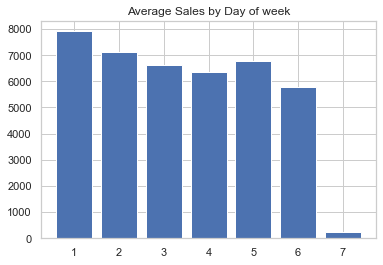

In [16]:
dayofweek_sales=pd.DataFrame(main_data.groupby('DayOfWeek')['Sales'].mean().reset_index())
plt.bar(dayofweek_sales['DayOfWeek'],dayofweek_sales['Sales'])
plt.title('Average Sales by Day of week')
plt.show()

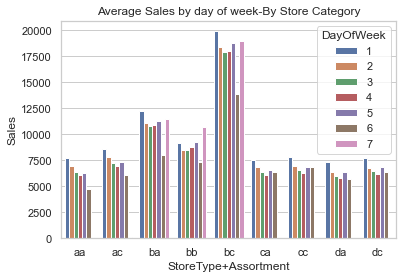

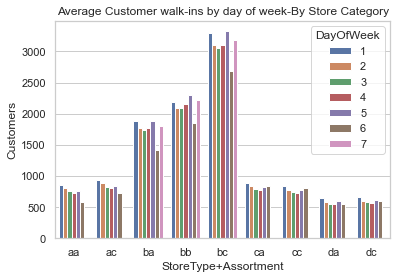

In [17]:
weekdata=main_data.groupby(['StoreType+Assortment','DayOfWeek'])['Sales'].mean().reset_index()
weekdata_cust=main_data.groupby(['StoreType+Assortment','DayOfWeek'])['Customers'].mean().reset_index()
sns.set_theme(style="whitegrid")
sns.barplot(data=weekdata,x="StoreType+Assortment", y="Sales", hue="DayOfWeek")
plt.title('Average Sales by day of week-By Store Category')
plt.show()

sns.set_theme(style="whitegrid")
sns.barplot(data=weekdata_cust,x="StoreType+Assortment", y="Customers", hue="DayOfWeek")
plt.title('Average Customer walk-ins by day of week-By Store Category')
plt.show()


**State Holidays-EDA**
<a id='Sthol'></a>

**Type B stores are the only category of stores that operate during State Holidays. Their average sales exceeds that of what they generate during a non-holiday-especially in the case of state holiday type B, which is Easter**

In [18]:
sthol_sales=main_data.groupby(['StoreType+Assortment','StateHoliday'])['Sales'].mean().reset_index()
sthol_cust=main_data.groupby(['StoreType+Assortment','StateHoliday'])['Customers'].mean().reset_index()

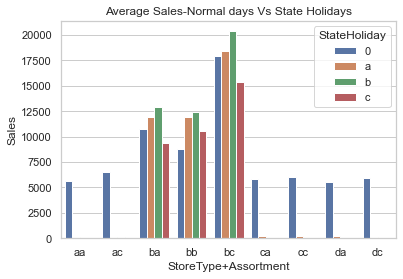

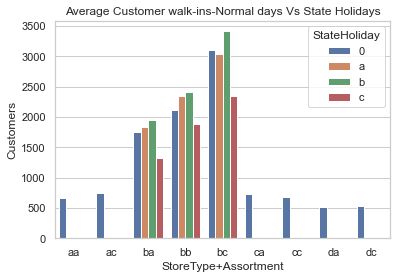

In [19]:
sns.set_theme(style="whitegrid")
sns.barplot(data=sthol_sales,x="StoreType+Assortment", y="Sales", hue="StateHoliday")
plt.title('Average Sales-Normal days Vs State Holidays')
plt.show()

sns.set_theme(style="whitegrid")
sns.barplot(data=sthol_cust,x="StoreType+Assortment", y="Customers", hue="StateHoliday")
plt.title('Average Customer walk-ins-Normal days Vs State Holidays')
plt.show()


**School Holidays-EDA**
<a id='Schhol'></a>

**Average sales and customer walkins increase on days that are impacted by School Holidays for all categories**

In [20]:
sch_hol=main_data[main_data['SchoolHoliday']==1]
sch_nohol=main_data[main_data['SchoolHoliday']==0]
unique_dates=main_data.drop_duplicates(subset=['Date'])['Date'].count()
schol_dates=sch_hol.drop_duplicates(subset=['Date'])['Date'].count()
average_sales_schol=sch_hol.groupby('Store')['Sales'].mean().reset_index()
average_sales_schol.columns=['Store','Average Sales when store is affected by closure of Public Schools']
average_sales_noschol=sch_nohol.groupby('Store')['Sales'].mean().reset_index()
average_sales_noschol.columns=['Store','Average Sales when store is not affected by closure of Public Schools']
average_sales_schol['Average Sales when store is not affected by closure of Public Schools']=average_sales_noschol['Average Sales when store is not affected by closure of Public Schools']
average_cust_schol=sch_hol.groupby('Store')['Customers'].mean().reset_index()
average_cust_schol.columns=['Store','Average Customer walkins when store is affected by closure of Public Schools']
average_cust_noschol=sch_nohol.groupby('Store')['Customers'].mean().reset_index()
average_cust_noschol.columns=['Store','Average Customer walkins when store is not affected by closure of Public Schools']
average_cust_schol['Average Customer walkins when store is not affected by closure of Public Schools']=average_cust_noschol['Average Customer walkins when store is not affected by closure of Public Schools']
store_data=store_data.merge(average_sales_schol,how='left',on='Store')
store_data=store_data.merge(average_cust_schol,how='left',on='Store')


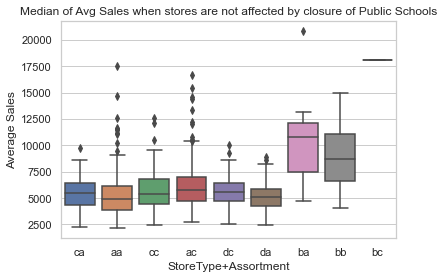

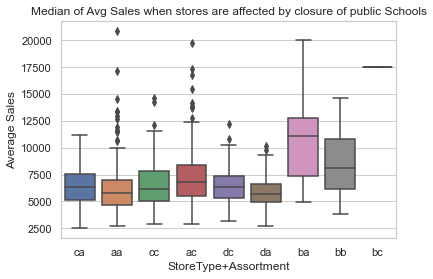

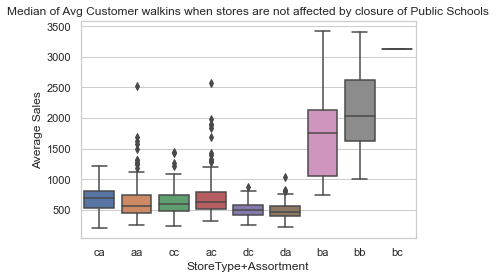

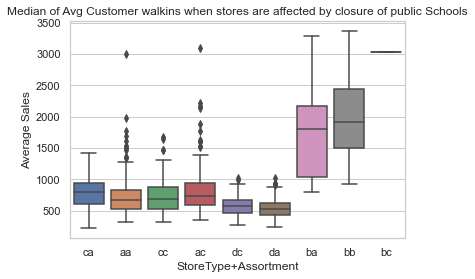

In [21]:
sns.boxplot(y='Average Sales when store is not affected by closure of Public Schools',x='StoreType+Assortment',data=store_data)
plt.title('Median of Avg Sales when stores are not affected by closure of Public Schools')
plt.ylabel('Average Sales')
plt.show()

sns.boxplot(y='Average Sales when store is affected by closure of Public Schools',x='StoreType+Assortment',data=store_data)
plt.title('Median of Avg Sales when stores are affected by closure of public Schools')
plt.ylabel('Average Sales')
plt.show()

sns.boxplot(y='Average Customer walkins when store is not affected by closure of Public Schools',x='StoreType+Assortment',data=store_data)
plt.title('Median of Avg Customer walkins when stores are not affected by closure of Public Schools')
plt.ylabel('Average Sales')
plt.show()

sns.boxplot(y='Average Customer walkins when store is affected by closure of Public Schools',x='StoreType+Assortment',data=store_data)
plt.title('Median of Avg Customer walkins when stores are affected by closure of public Schools')
plt.ylabel('Average Sales')
plt.show()




**But this cant be attributed to a significant correlation between School Holidays and Sales/Customer walkins as evdient from th heatmap below**

In [22]:
sch_hol=main_data[main_data['SchoolHoliday']==1]
sch_nohol=main_data[main_data['SchoolHoliday']==0]
unique_dates=main_data.drop_duplicates(subset=['Date'])['Date'].count()
schol_dates=sch_hol.drop_duplicates(subset=['Date'])['Date'].count()
schol_dates_df=pd.DataFrame(sch_hol.drop_duplicates(subset=['Date'])['Date']).reset_index(drop=True)
schol_dates_df.columns=['Date']
sch_year=pd.DataFrame(schol_dates_df.Date.dt.year)
sch_month=month=pd.DataFrame(schol_dates_df.Date.dt.month)
schol_dates_df['Sch-Year']=sch_year['Date']
schol_dates_df['Sch-Month']=sch_month['Date']
line_data_2013=main_data[main_data['Year of Sale']==2013].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
line_data_2013_cust=main_data[main_data['Year of Sale']==2013].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
sch_2013=schol_dates_df[schol_dates_df['Sch-Year']==2013].groupby('Sch-Month')['Date'].agg(['count']).reset_index()
line_data_2014=main_data[main_data['Year of Sale']==2014].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
line_data_2014_cust=main_data[main_data['Year of Sale']==2014].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
sch_2014=schol_dates_df[schol_dates_df['Sch-Year']==2014].groupby('Sch-Month')['Date'].agg(['count']).reset_index()
line_data_2015=main_data[main_data['Year of Sale']==2015].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
line_data_2015_cust=main_data[main_data['Year of Sale']==2015].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
sch_2015=schol_dates_df[schol_dates_df['Sch-Year']==2015].groupby('Sch-Month')['Date'].agg(['count']).reset_index()
line_data_2013['No. of Days with School Holidays']=sch_2013['count']
line_data_2013['Customers']=line_data_2013_cust['sum']
line_data_2014['No. of Days with School Holidays']=sch_2014['count']
line_data_2014['Customers']=line_data_2014_cust['sum']
line_data_2015['No. of Days with School Holidays']=sch_2015['count']
line_data_2015['Customers']=line_data_2015_cust['sum']

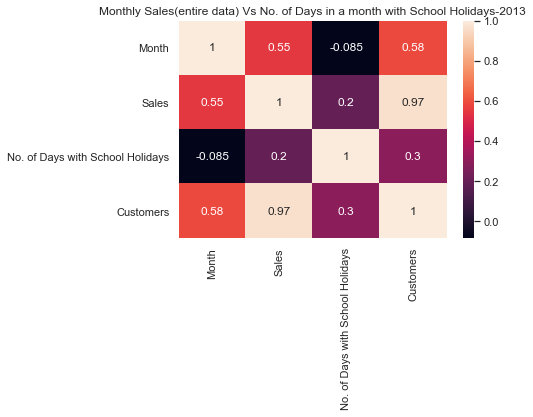

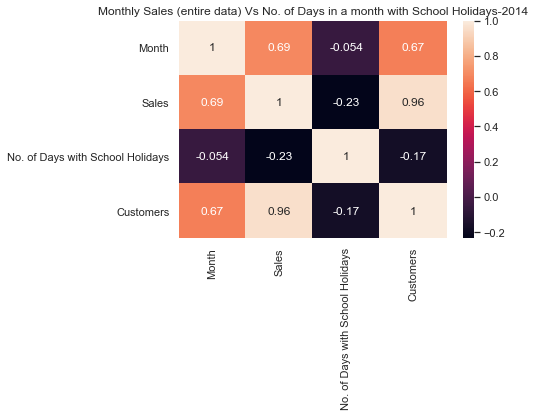

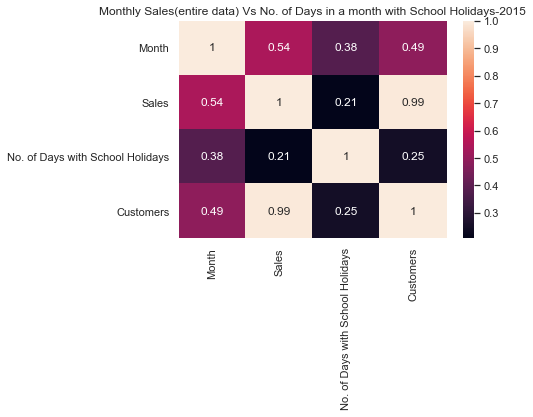

In [23]:
sch_labels=['Month','Sales','No. of Days with School Holidays','Customers']
corr_sch1=np.array(line_data_2013.corr())
sns.heatmap(corr_sch1,annot=True,xticklabels=sch_labels,yticklabels=sch_labels)
plt.title('Monthly Sales(entire data) Vs No. of Days in a month with School Holidays-2013')
plt.show()

corr_sch2=np.array(line_data_2014.corr())
sns.heatmap(corr_sch2,annot=True,xticklabels=sch_labels,yticklabels=sch_labels)
plt.title('Monthly Sales (entire data) Vs No. of Days in a month with School Holidays-2014')
plt.show()

corr_sch3=np.array(line_data_2015.corr())
sns.heatmap(corr_sch3,annot=True,xticklabels=sch_labels,yticklabels=sch_labels)
plt.title('Monthly Sales(entire data) Vs No. of Days in a month with School Holidays-2015')
plt.show()





**Promotional Strategies**

RossMann Stores employs Single day and Month Long promotions

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating


**Single Day Promotions**
<a id='Promo1'></a>

In [24]:
promo_df=main_data[main_data['Promo']==1]
nopromo_df=main_data[main_data['Promo']==0]
single_promo_dates=pd.DataFrame(promo_df.drop_duplicates(subset=['Date'])['Date']).reset_index(drop=True)
single_promo_list=promo_df.drop_duplicates(subset=['Date'])['Date'].tolist()
single_promo_store=pd.DataFrame(promo_df.groupby('Date')['Store'].count().tolist())
single_promo_store.columns=['No of Stores with a Single Day Promo']
single_promo_dates['No of Stores with a Single Day Promo']=single_promo_store['No of Stores with a Single Day Promo']
average_sales_promo=promo_df.groupby('Store')['Sales'].mean().reset_index()
average_sales_promo.columns=['Store','Average Sales when there is a one-day Promo']
average_sales_nopromo=nopromo_df.groupby('Store')['Sales'].mean().reset_index()
average_sales_nopromo.columns=['Store','Average Sales when there is no one-day Promo']
average_sales_promo['Average Sales when there is no one-day Promo']=average_sales_nopromo['Average Sales when there is no one-day Promo']
store_data=store_data.merge(average_sales_promo,how='left',on='Store')
average_customers_promo=promo_df.groupby('Store')['Customers'].mean().reset_index()
average_customers_promo.columns=['Store','Average Customer walkins when there is a one-day Promo']
average_customers_nopromo=nopromo_df.groupby('Store')['Customers'].mean().reset_index()
average_customers_nopromo.columns=['Store','Average Customer walkins when there is no one-day Promo']
average_customers_promo['Average Customer walkins when there is no one-day Promo']=average_customers_nopromo['Average Customer walkins when there is no one-day Promo']
store_data=store_data.merge(average_customers_promo,how='left',on='Store')

**There is a significant increase in average sales and average customer walkins when there is a one day promo running-across all store categories**

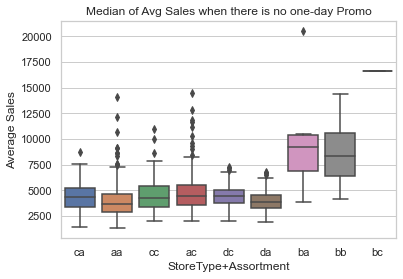

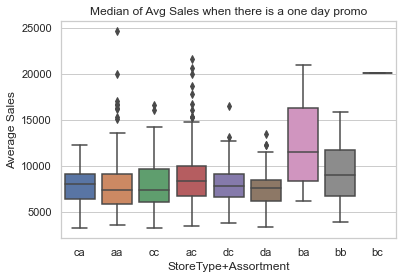

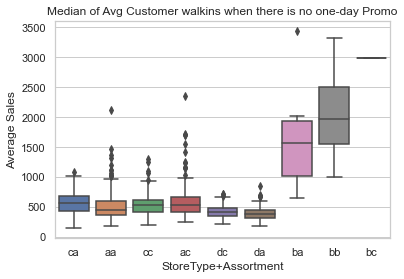

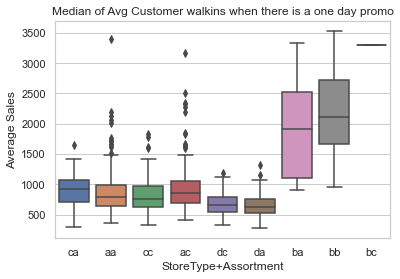

In [25]:
sns.boxplot(y='Average Sales when there is no one-day Promo',x='StoreType+Assortment',data=store_data)
plt.title('Median of Avg Sales when there is no one-day Promo')
plt.ylabel('Average Sales')
plt.show()

sns.boxplot(y='Average Sales when there is a one-day Promo',x='StoreType+Assortment',data=store_data)
plt.title('Median of Avg Sales when there is a one day promo')
plt.ylabel('Average Sales')
plt.show()

sns.boxplot(y='Average Customer walkins when there is no one-day Promo',x='StoreType+Assortment',data=store_data)
plt.title('Median of Avg Customer walkins when there is no one-day Promo')
plt.ylabel('Average Sales')
plt.show()

sns.boxplot(y='Average Customer walkins when there is a one-day Promo',x='StoreType+Assortment',data=store_data)
plt.title('Median of Avg Customer walkins when there is a one day promo')
plt.ylabel('Average Sales')
plt.show()




In [26]:
promo_df=main_data[main_data['Promo']==1]
nopromo_df=main_data[main_data['Promo']==0]
single_promo_dates=pd.DataFrame(promo_df.drop_duplicates(subset=['Date'])['Date']).reset_index(drop=True)
single_promo_list=promo_df.drop_duplicates(subset=['Date'])['Date'].tolist()
single_promo_store=pd.DataFrame(promo_df.groupby('Date')['Store'].count().tolist())
single_promo_store.columns=['No of Stores with a Single Day Promo']
single_promo_dates['No of Stores with a Single Day Promo']=single_promo_store['No of Stores with a Single Day Promo']
single_promo_dates[single_promo_dates['No of Stores with a Single Day Promo']!=935]

Empty DataFrame
Columns: [Date, No of Stores with a Single Day Promo]
Index: []

**Single day promos are run on the same days across all 935 stores**

**For each of the years individually,there is an increase in sales/Customer walkins in months where there is an increase in no. of days with daily promotions-The exception to this is the last couple of months of the year**




In [54]:
promo_year=pd.DataFrame(single_promo_dates.Date.dt.year)
promo_month=month=pd.DataFrame(single_promo_dates.Date.dt.month)
single_promo_dates['Promo Year']=promo_year['Date']
single_promo_dates['Promo Month']=promo_month['Date']

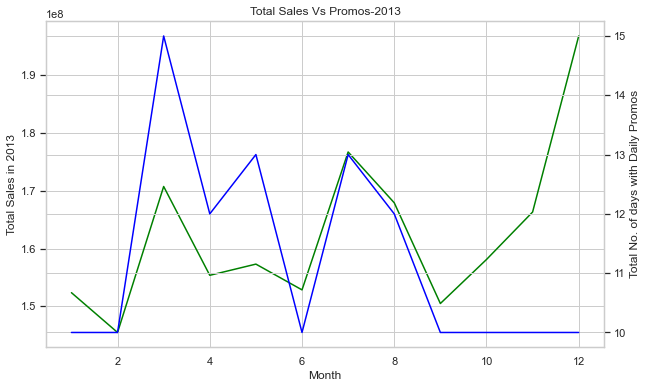

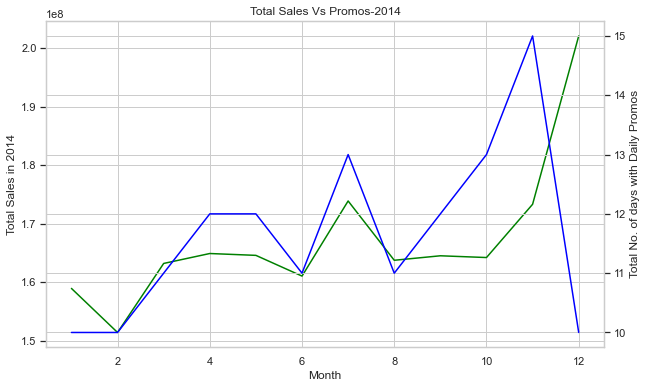

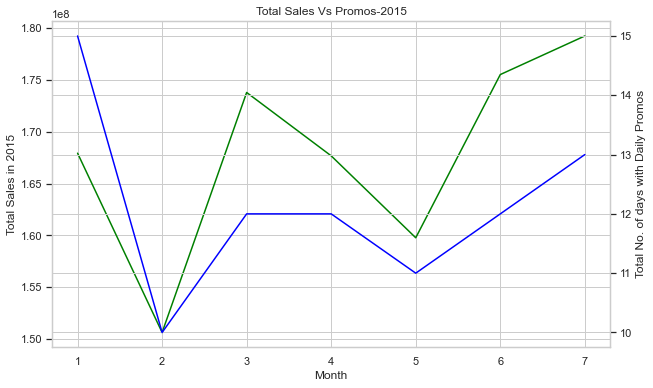

In [55]:
line_data_2013=main_data[main_data['Year of Sale']==2013].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
promo_2013=single_promo_dates[single_promo_dates['Promo Year']==2013].groupby('Promo Month')['Date'].agg(['count']).reset_index()


line_data_2014=main_data[main_data['Year of Sale']==2014].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
promo_2014=single_promo_dates[single_promo_dates['Promo Year']==2014].groupby('Promo Month')['Date'].agg(['count']).reset_index()


line_data_2015=main_data[main_data['Year of Sale']==2015].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
promo_2015=single_promo_dates[single_promo_dates['Promo Year']==2015].groupby('Promo Month')['Date'].agg(['count']).reset_index()


fig,ax1=plt.subplots(figsize=(10,6))
ax1.set_title('Total Sales Vs Promos-2013')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales in 2013')
ax1=sns.lineplot(x='Month of Sale',y='sum',data=line_data_2013,color='green')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Total No. of days with Daily Promos')
ax2=sns.lineplot(x='Promo Month',y='count',data=promo_2013,color='blue')
ax2.tick_params(axis='y')
plt.show()



fig,ax1=plt.subplots(figsize=(10,6))
ax1.set_title('Total Sales Vs Promos-2014')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales in 2014')
ax1=sns.lineplot(x='Month of Sale',y='sum',data=line_data_2014,color='green')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Total No. of days with Daily Promos')
ax2=sns.lineplot(x='Promo Month',y='count',data=promo_2014,color='blue')
ax2.tick_params(axis='y')
plt.show()



fig,ax1=plt.subplots(figsize=(10,6))
ax1.set_title('Total Sales Vs Promos-2015')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales in 2015')
ax1=sns.lineplot(x='Month of Sale',y='sum',data=line_data_2015,color='green')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Total No. of days with Daily Promos')
ax2=sns.lineplot(x='Promo Month',y='count',data=promo_2015,color='blue')
ax2.tick_params(axis='y')
plt.show()


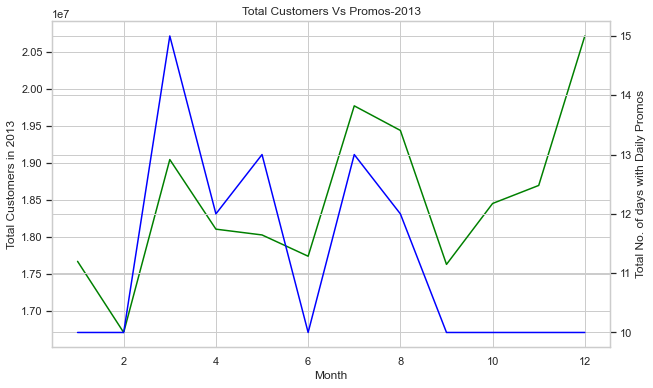

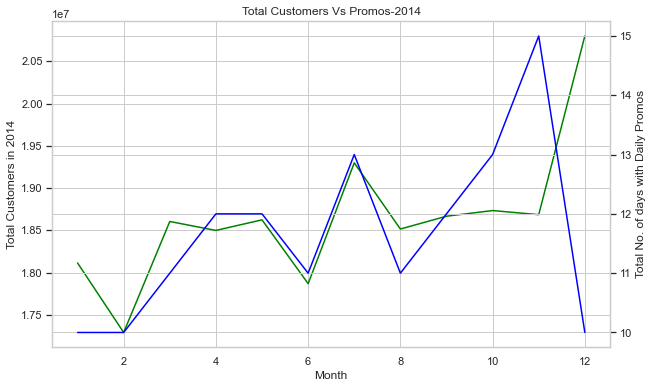

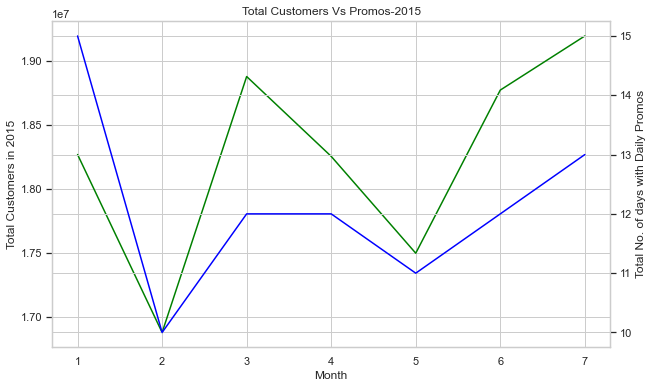

In [29]:
cust_line_data_2013=main_data[main_data['Year of Sale']==2013].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
cust_line_data_2014=main_data[main_data['Year of Sale']==2014].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
cust_line_data_2015=main_data[main_data['Year of Sale']==2015].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()


fig,ax1=plt.subplots(figsize=(10,6))
ax1.set_title('Total Customers Vs Promos-2013')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Customers in 2013')
ax1=sns.lineplot(x='Month of Sale',y='sum',data=cust_line_data_2013,color='green')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Total No. of days with Daily Promos')
ax2=sns.lineplot(x='Promo Month',y='count',data=promo_2013,color='blue')
ax2.tick_params(axis='y')
plt.show()



fig,ax1=plt.subplots(figsize=(10,6))
ax1.set_title('Total Customers Vs Promos-2014')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Customers in 2014')
ax1=sns.lineplot(x='Month of Sale',y='sum',data=cust_line_data_2014,color='green')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Total No. of days with Daily Promos')
ax2=sns.lineplot(x='Promo Month',y='count',data=promo_2014,color='blue')
ax2.tick_params(axis='y')
plt.show()



fig,ax1=plt.subplots(figsize=(10,6))
ax1.set_title('Total Customers Vs Promos-2015')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Customers in 2015')
ax1=sns.lineplot(x='Month of Sale',y='sum',data=cust_line_data_2015,color='green')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Total No. of days with Daily Promos')
ax2=sns.lineplot(x='Promo Month',y='count',data=promo_2015,color='blue')
ax2.tick_params(axis='y')
plt.show()


**But this cant be attributed to a material correlation between daily promos and sales/customer walkins in any of the years, except for 2015-where we have data for only 7 months**

In [56]:
cust_line_data_2013

Month of Sale       sum  No. of days with daily promotions
0               1  17666699                                 10
1               2  16705177                                 10
2               3  19042992                                 15
3               4  18101936                                 12
4               5  18023777                                 13
5               6  17736050                                 10
6               7  19769026                                 13
7               8  19436673                                 12
8               9  17625478                                 10
9              10  18449341                                 10
10             11  18693067                                 10
11             12  20713868                                 10

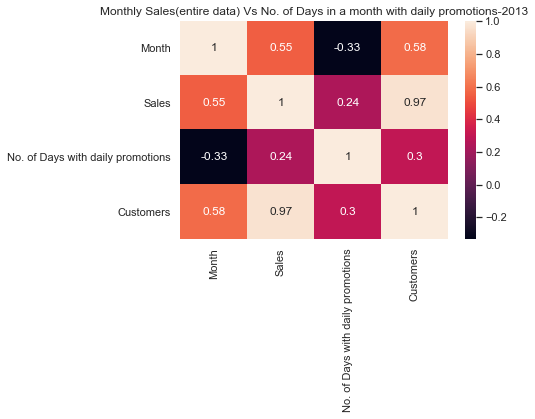

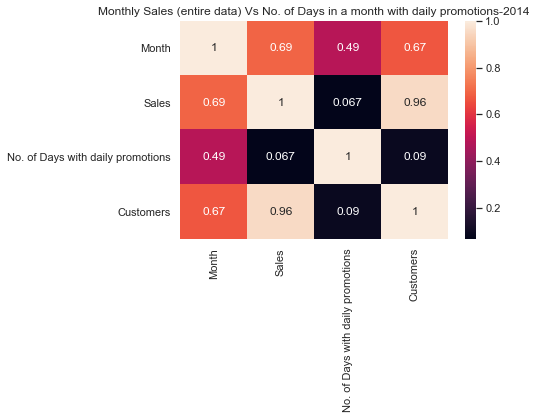

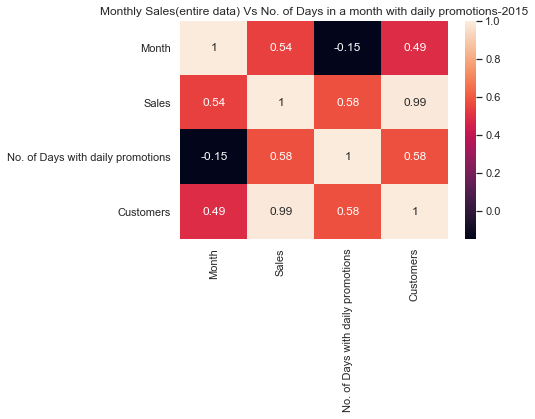

In [57]:
line_data_2013['No. of days with daily promotions']=promo_2013['count']
line_data_2013['Customers']=cust_line_data_2013['sum']
line_data_2014['No. of days with daily promotions']=promo_2014['count']
line_data_2014['Customers']=cust_line_data_2014['sum']
line_data_2015['No. of days with daily promotions']=promo_2015['count']
line_data_2015['Customers']=cust_line_data_2015['sum']

promo_labels=['Month','Sales','No. of Days with daily promotions','Customers']
corr_promo1=np.array(line_data_2013.corr())
sns.heatmap(corr_promo1,annot=True,xticklabels=promo_labels,yticklabels=promo_labels)
plt.title('Monthly Sales(entire data) Vs No. of Days in a month with daily promotions-2013')
plt.show()

corr_promo2=np.array(line_data_2014.corr())
sns.heatmap(corr_promo2,annot=True,xticklabels=promo_labels,yticklabels=promo_labels)
plt.title('Monthly Sales (entire data) Vs No. of Days in a month with daily promotions-2014')
plt.show()

corr_promo3=np.array(line_data_2015.corr())
sns.heatmap(corr_promo3,annot=True,xticklabels=promo_labels,yticklabels=promo_labels)
plt.title('Monthly Sales(entire data) Vs No. of Days in a month with daily promotions-2015')
plt.show()




**While calculating correlation coefficients between Monthly sales/Customer walkins and No. of promo days in a month, for 11,10,9,8 and 7 months, we are getting some material results (above 0.50)**

**The correlation is the highest at 7 months**

**Overall correlation increases in 2014 and decreases in 2015(where it is lesser than 2013)**

In [45]:
store_list1=main_data.drop_duplicates(subset=['Store'])['Store'].tolist()

In [46]:
eight=complete_month+[8]
nine=eight+[9]
ten=nine+[10]
eleven=ten+[11]
listofmonths=[eleven,ten,nine,eight,complete_month]

In [47]:
single_promo_2013=single_promo_dates[single_promo_dates['Promo Year']==2013]
single_promo_2014=single_promo_dates[single_promo_dates['Promo Year']==2014]
single_promo_2015=single_promo_dates[single_promo_dates['Promo Year']==2015]


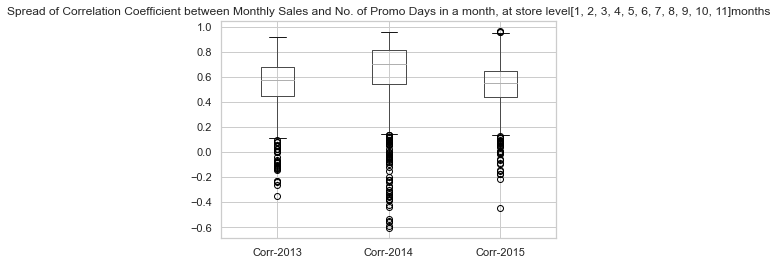

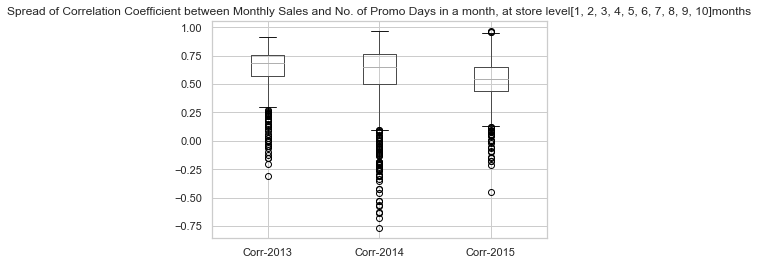

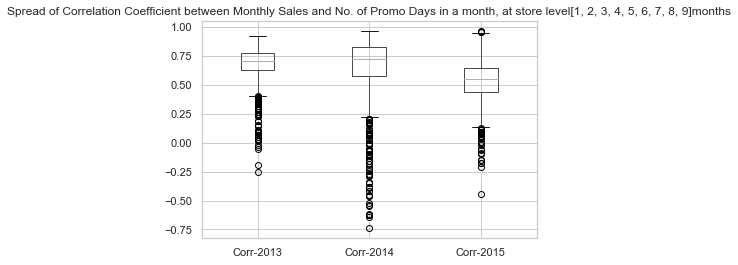

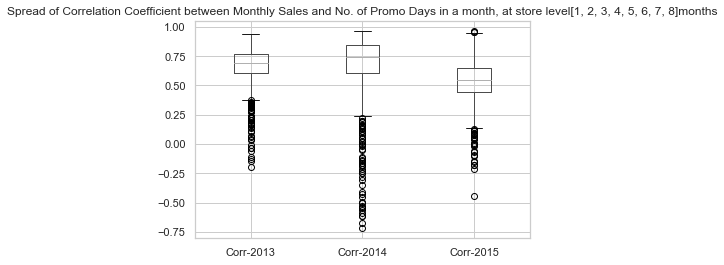

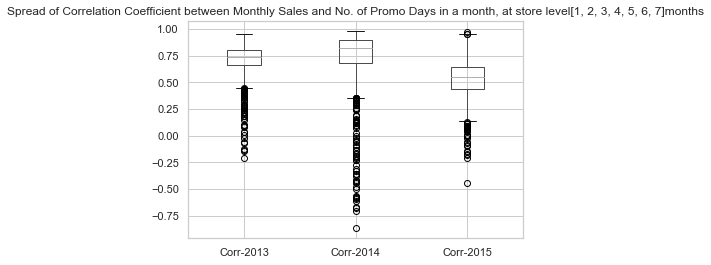

In [48]:
for l in listofmonths:
    store_corr_2013=[]
    store_corr_2014=[]
    store_corr_2015=[]
    for s in store_list1:
        single_promo_l_2013=single_promo_2013[single_promo_2013['Promo Month'].isin(l)]
        single_promo_l_2014=single_promo_2014[single_promo_2014['Promo Month'].isin(l)]
        single_promo_l_2015=single_promo_2015[single_promo_2015['Promo Month'].isin(l)]
        l_year1=year1_data[year1_data['Month of Sale'].isin(l)]
        l_year2=year2_data[year2_data['Month of Sale'].isin(l)]
        l_year3=year3_data[year3_data['Month of Sale'].isin(l)]
        store_sales_2013=l_year1[l_year1['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
        store_promo_2013=single_promo_l_2013.groupby('Promo Month')['Date'].agg(['count']).reset_index()
        store_sales_2013['Promo Days']=store_promo_2013['count']
        corr_2013=np.array(store_sales_2013.corr())
        corr_2013_a=corr_2013[1,2]
        store_corr_2013.append(corr_2013_a)
        store_sales_2014=l_year2[l_year2['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
        store_promo_2014=single_promo_l_2014.groupby('Promo Month')['Date'].agg(['count']).reset_index()
        store_sales_2014['Promo Days']=store_promo_2014['count']
        corr_2014=np.array(store_sales_2014.corr())
        corr_2014_a=corr_2014[1,2]
        store_corr_2014.append(corr_2014_a)
        store_sales_2015=l_year3[l_year3['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
        store_promo_2015=single_promo_l_2015.groupby('Promo Month')['Date'].agg(['count']).reset_index()
        store_sales_2015['Promo Days']=store_promo_2015['count']
        corr_2015=np.array(store_sales_2015.corr())
        corr_2015_a=corr_2015[1,2]
        store_corr_2015.append(corr_2015_a)
    store_list2=pd.DataFrame(store_list1)
    store_list2.columns=['Store']
    store_corr_2013=pd.DataFrame(store_corr_2013)
    store_corr_2013.columns=['Count']
    store_corr_2014=pd.DataFrame(store_corr_2014)
    store_corr_2014.columns=['Count']
    store_corr_2015=pd.DataFrame(store_corr_2015)
    store_corr_2015.columns=['Count']
    store_list2['Corr-2013']=store_corr_2013['Count']
    store_list2['Corr-2014']=store_corr_2014['Count']
    store_list2['Corr-2015']=store_corr_2015['Count']
    store_list2.boxplot(column=['Corr-2013','Corr-2014','Corr-2015'])
    plt.title('Spread of Correlation Coefficient between Monthly Sales and No. of Promo Days in a month, at store level'+str(l)+'months')
    plt.show()

        
    

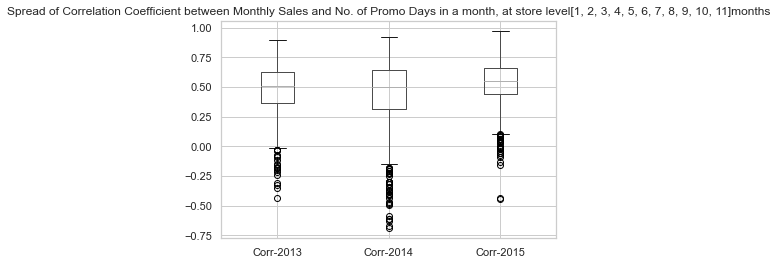

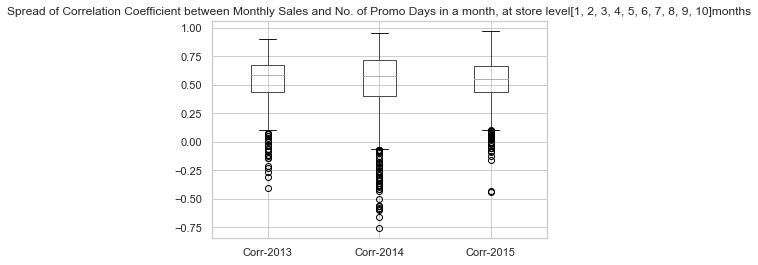

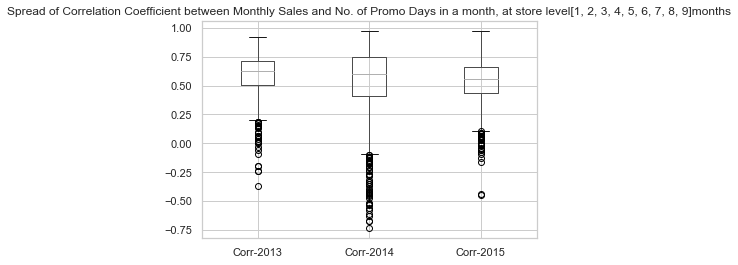

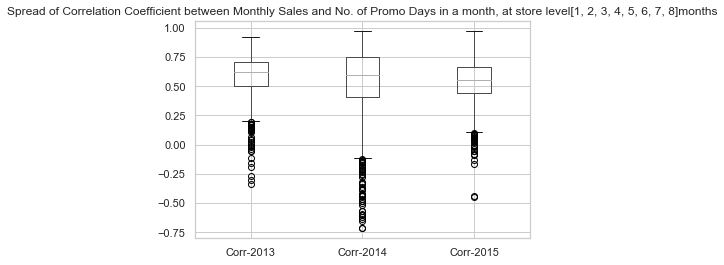

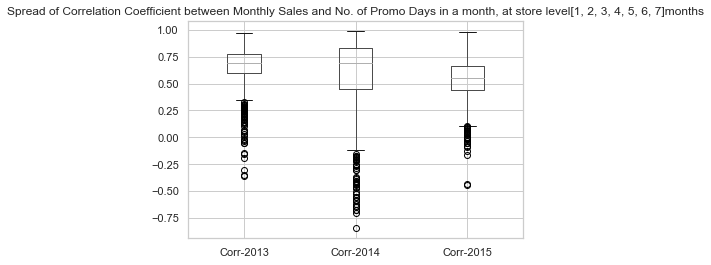

In [49]:
for l in listofmonths:
    store_corr_2013=[]
    store_corr_2014=[]
    store_corr_2015=[]
    for s in store_list1:
        single_promo_l_2013=single_promo_2013[single_promo_2013['Promo Month'].isin(l)]
        single_promo_l_2014=single_promo_2014[single_promo_2014['Promo Month'].isin(l)]
        single_promo_l_2015=single_promo_2015[single_promo_2015['Promo Month'].isin(l)]
        l_year1=year1_data[year1_data['Month of Sale'].isin(l)]
        l_year2=year2_data[year2_data['Month of Sale'].isin(l)]
        l_year3=year3_data[year3_data['Month of Sale'].isin(l)]
        store_cust_2013=l_year1[l_year1['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
        store_promo_2013=single_promo_l_2013.groupby('Promo Month')['Date'].agg(['count']).reset_index()
        store_cust_2013['Promo Days']=store_promo_2013['count']
        corr_2013=np.array(store_cust_2013.corr())
        corr_2013_a=corr_2013[1,2]
        store_corr_2013.append(corr_2013_a)
        store_cust_2014=l_year2[l_year2['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
        store_promo_2014=single_promo_l_2014.groupby('Promo Month')['Date'].agg(['count']).reset_index()
        store_cust_2014['Promo Days']=store_promo_2014['count']
        corr_2014=np.array(store_cust_2014.corr())
        corr_2014_a=corr_2014[1,2]
        store_corr_2014.append(corr_2014_a)
        store_cust_2015=l_year3[l_year3['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
        store_promo_2015=single_promo_l_2015.groupby('Promo Month')['Date'].agg(['count']).reset_index()
        store_cust_2015['Promo Days']=store_promo_2015['count']
        corr_2015=np.array(store_cust_2015.corr())
        corr_2015_a=corr_2015[1,2]
        store_corr_2015.append(corr_2015_a)
    store_list2=pd.DataFrame(store_list1)
    store_list2.columns=['Store']
    store_corr_2013=pd.DataFrame(store_corr_2013)
    store_corr_2013.columns=['Count']
    store_corr_2014=pd.DataFrame(store_corr_2014)
    store_corr_2014.columns=['Count']
    store_corr_2015=pd.DataFrame(store_corr_2015)
    store_corr_2015.columns=['Count']
    store_list2['Corr-2013']=store_corr_2013['Count']
    store_list2['Corr-2014']=store_corr_2014['Count']
    store_list2['Corr-2015']=store_corr_2015['Count']
    store_list2.boxplot(column=['Corr-2013','Corr-2014','Corr-2015'])
    plt.title('Spread of Correlation Coefficient between Monthly Sales and No. of Promo Days in a month, at store level'+str(l)+'months')
    plt.show()

In [51]:
%store promo_df


Stored 'promo_df' (DataFrame)


**We found a material correlation between the Monthly sales/Custome walk-ins on Promo days and the No. of promo days in a month in all three years, while taking into account all the months of the year**

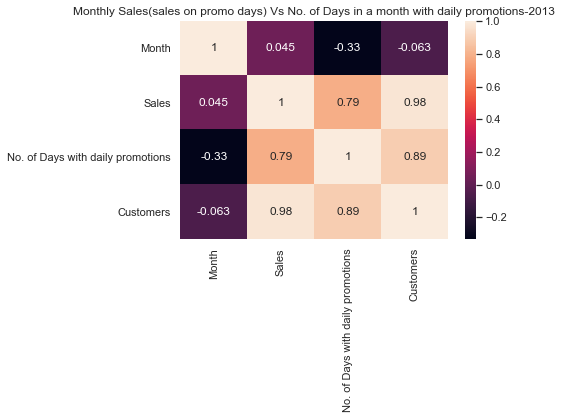

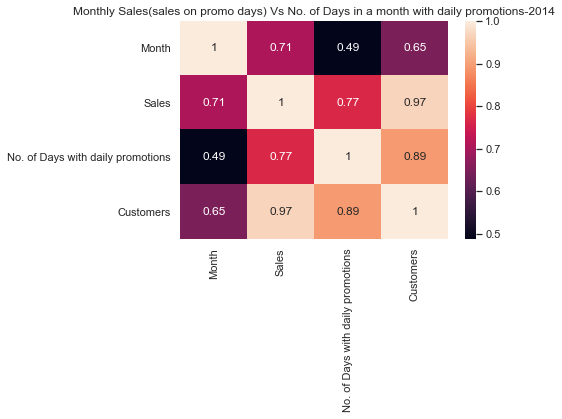

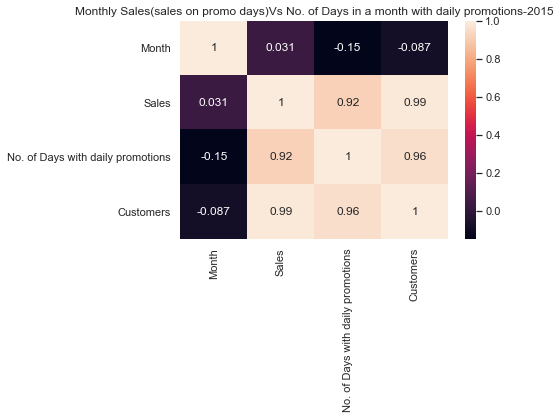

In [53]:
df_promo_2013=promo_df[promo_df['Year of Sale']==2013].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
df_promo_2013['No. of days with daily promotions']=promo_2013['count']
df_promo_2013_cust=promo_df[promo_df['Year of Sale']==2013].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
df_promo_2013['Customers']=df_promo_2013_cust['sum']

df_promo_2014=promo_df[promo_df['Year of Sale']==2014].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
df_promo_2014['No. of days with daily promotions']=promo_2014['count']
df_promo_2014_cust=promo_df[promo_df['Year of Sale']==2014].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
df_promo_2014['Customers']=df_promo_2014_cust['sum']

df_promo_2015=promo_df[promo_df['Year of Sale']==2015].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
df_promo_2015['No. of days with daily promotions']=promo_2015['count']
df_promo_2015_cust=promo_df[promo_df['Year of Sale']==2015].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
df_promo_2015['Customers']=df_promo_2015_cust['sum']

promo_labels=['Month','Sales','No. of Days with daily promotions','Customers']
corr_promo4=np.array(df_promo_2013.corr())
sns.heatmap(corr_promo4,annot=True,xticklabels=promo_labels,yticklabels=promo_labels)
plt.title('Monthly Sales(sales on promo days) Vs No. of Days in a month with daily promotions-2013')
plt.show()

corr_promo5=np.array(df_promo_2014.corr())
sns.heatmap(corr_promo5,annot=True,xticklabels=promo_labels,yticklabels=promo_labels)
plt.title('Monthly Sales(sales on promo days) Vs No. of Days in a month with daily promotions-2014')
plt.show()

corr_promo6=np.array(df_promo_2015.corr())
sns.heatmap(corr_promo6,annot=True,xticklabels=promo_labels,yticklabels=promo_labels)
plt.title('Monthly Sales(sales on promo days)Vs No. of Days in a month with daily promotions-2015')
plt.show()



**Month Long promotions**
<a id='Promo2'></a>

In [58]:
promo2_df=store_data[store_data['Promo2']==1]
print(str(promo2_df['Store'].count())+' out of the 935 stores in our dataset have consecutive promotions running')

415 out of the 935 stores in our dataset have consecutive promotions running


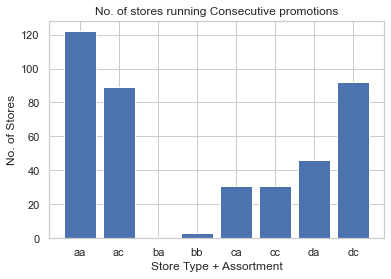

In [59]:
promo2_stores=pd.DataFrame(promo2_df.groupby('StoreType+Assortment')['Store'].count().reset_index())
plt.bar(promo2_stores['StoreType+Assortment'],promo2_stores['Store'])
plt.title('No. of stores running Consecutive promotions')
plt.xlabel('Store Type + Assortment')
plt.ylabel('No. of Stores')
plt.show()

**There are no consecutive promotions at store category bc**

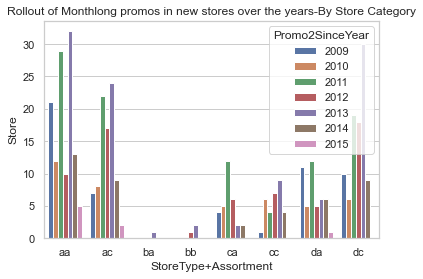

In [73]:
promo2data=promo2_df.groupby(['StoreType+Assortment','Promo2SinceYear'])['Store'].count().reset_index()
sns.set_theme(style="whitegrid")
sns.barplot(data=promo2data,x="StoreType+Assortment", y="Store", hue="Promo2SinceYear")
plt.title('Rollout of Monthlong promos in new stores over the years-By Store Category')
plt.show()


**Analaysis done on Month long promotions**

**1. Overall Average sales in stores that run Promo2 and stores that don't-Cummulative and For each Store Category**

   **Overall Average Customer walk-ins in stores that run Promo2 and stores that don't-Cummulative and For each Store Category**

**2. (On the specific months when Promo2 is run) Overall Average sales in stores that run Promo2 and stores that don't-Cummulative and For each Store Category**

   **(On the specific months when Promo2 is run) Overall Average Customer walk-ins in stores that run Promo2 and stores that don't-Cummulative and For each Store Category**

**3. (In stores that Run Promo2) Average Sales in months when Promo2 is runs Vs in months when its not-Cummulative and For each Store Category**

   **(In stores that Run Promo2) Average Customer walkins in months when Promo2 is runs Vs in months when its not-Cummulative and For each Store Category**





**At a cummulative level,average sales and customer walkins is lower in stores that run Promo2-in the case of all three intervals**
**At an individual store category level,(Find plots below)**

**1. There is a positive impact of promo 2 on sales in Store category CA(INT3)**

**2. There is a positive impact of promo 2 on sales in Store category DC(INT2)**

**3. There is a positive impact of promo 2 on sales and customer walk-ins in Store category BA(INT1)**

In [76]:
int1_month=[1,4,7,10]
int2_month=[2,5,8,11]
int3_month=[3,6,9,12]
int_month=[int1_month,int2_month,int3_month]
promo2_store_list=promo2_df.drop_duplicates(subset=['Store'])['Store'].tolist()
main_promo2=main_data[main_data['Store'].isin(promo2_store_list)]
nopromo2_df=store_data[store_data['Promo2']==0]
nopromo2_store_list=nopromo2_df.drop_duplicates(subset=['Store'])['Store'].tolist()
main_nopromo2=main_data[main_data['Store'].isin(nopromo2_store_list)]
avg_sales_nopromo2=main_nopromo2.groupby('Date')['Sales'].mean().reset_index()
avg_sales_nopromo2.columns=['Date','Sales in Stores that donot run Promo2']
avg_sales_promo2=main_promo2.groupby('Date')['Sales'].mean().reset_index()
avg_sales_nopromo2['Sales in stores that run Promo2']=avg_sales_promo2['Sales']
int1_promo2=promo2_df[promo2_df['PromoInterval']=='Jan,Apr,Jul,Oct']['Store'].tolist()
int2_promo2=promo2_df[promo2_df['PromoInterval']=='Feb,May,Aug,Nov']['Store'].tolist()
int3_promo2=promo2_df[promo2_df['PromoInterval']=='Mar,Jun,Sept,Dec']['Store'].tolist()
int1_promo2_df=main_data[main_data['Store'].isin(int1_promo2)]
int2_promo2_df=main_data[main_data['Store'].isin(int2_promo2)]
int3_promo2_df=main_data[main_data['Store'].isin(int3_promo2)]
avg_sales_int1_promo2=int1_promo2_df.groupby('Date')['Sales'].mean().reset_index()
avg_sales_int2_promo2=int2_promo2_df.groupby('Date')['Sales'].mean().reset_index()
avg_sales_int3_promo2=int3_promo2_df.groupby('Date')['Sales'].mean().reset_index()
avg_sales_nopromo2['Sales in stores that run Promo2 in Jan,Apr,jul,Oct']=avg_sales_int1_promo2['Sales']
avg_sales_nopromo2['Sales in stores that run Promo2 in Feb,May,Aug,Nov']=avg_sales_int2_promo2['Sales']
avg_sales_nopromo2['Sales in stores that run Promo2 in Mar,Jun,Sept,Dec']=avg_sales_int3_promo2['Sales']
avg_cust_nopromo2=main_nopromo2.groupby('Date')['Customers'].mean().reset_index()
avg_cust_nopromo2.columns=['Date','Customers in Stores that donot run Promo2']
avg_cust_promo2=main_promo2.groupby('Date')['Customers'].mean().reset_index()
avg_cust_nopromo2['Customers in stores that run Promo2']=avg_cust_promo2['Customers']
avg_cust_int1_promo2=int1_promo2_df.groupby('Date')['Customers'].mean().reset_index()
avg_cust_int2_promo2=int2_promo2_df.groupby('Date')['Customers'].mean().reset_index()
avg_cust_int3_promo2=int3_promo2_df.groupby('Date')['Customers'].mean().reset_index()
avg_cust_nopromo2['Customers in stores that run Promo2 in Jan,Apr,jul,Oct']=avg_cust_int1_promo2['Customers']
avg_cust_nopromo2['Customers in stores that run Promo2 in Feb,May,Aug,Nov']=avg_cust_int2_promo2['Customers']
avg_cust_nopromo2['Customers in stores that run Promo2 in Mar,Jun,Sept,Dec']=avg_cust_int3_promo2['Customers']



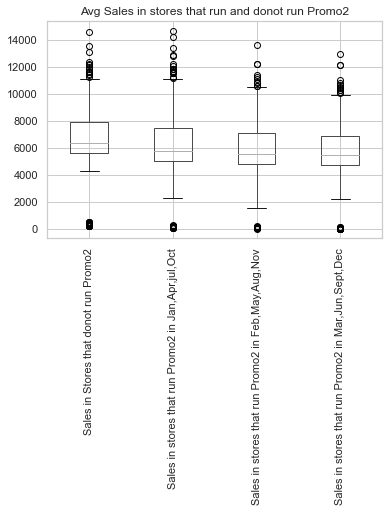

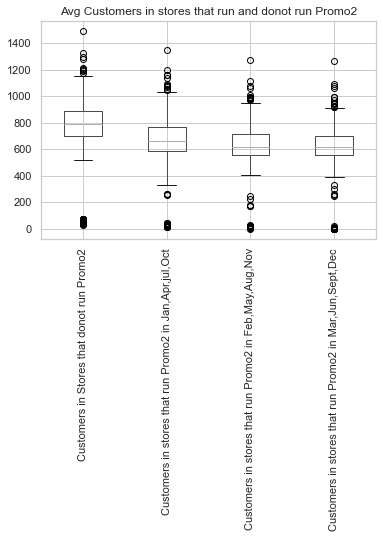

In [77]:
avg_sales_nopromo2.boxplot(column=['Sales in Stores that donot run Promo2','Sales in stores that run Promo2 in Jan,Apr,jul,Oct','Sales in stores that run Promo2 in Feb,May,Aug,Nov','Sales in stores that run Promo2 in Mar,Jun,Sept,Dec'])
plt.xticks(rotation=90)
plt.title('Avg Sales in stores that run and donot run Promo2')
plt.show()


avg_cust_nopromo2.boxplot(column=['Customers in Stores that donot run Promo2','Customers in stores that run Promo2 in Jan,Apr,jul,Oct','Customers in stores that run Promo2 in Feb,May,Aug,Nov','Customers in stores that run Promo2 in Mar,Jun,Sept,Dec'])
plt.xticks(rotation=90)
plt.title('Avg Customers in stores that run and donot run Promo2')
plt.show()


In [78]:
cat_list=main_data.drop_duplicates(subset=['StoreType+Assortment'])['StoreType+Assortment'].tolist()

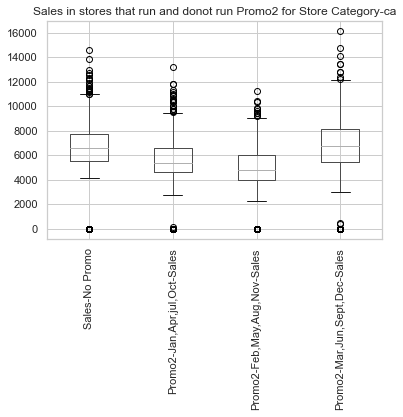

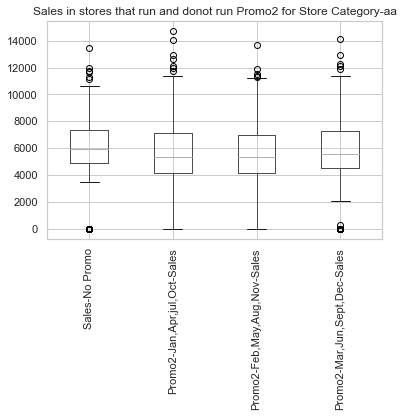

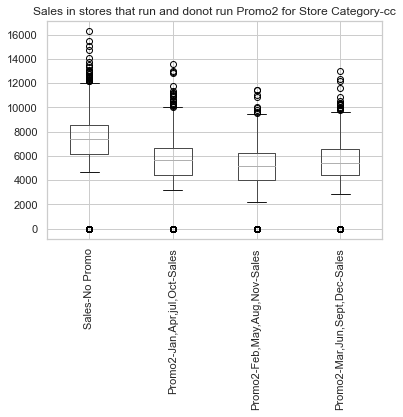

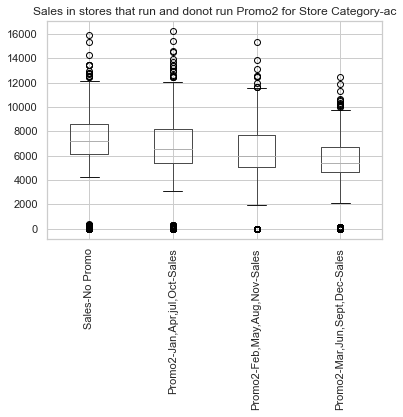

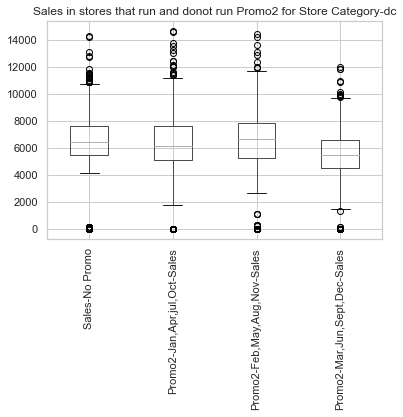

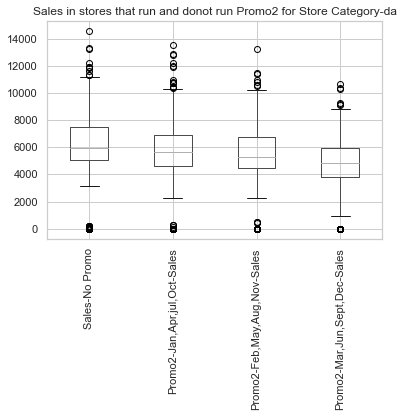

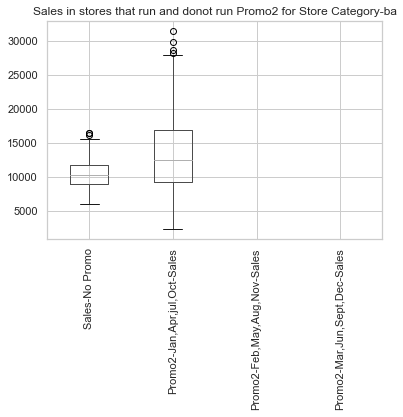

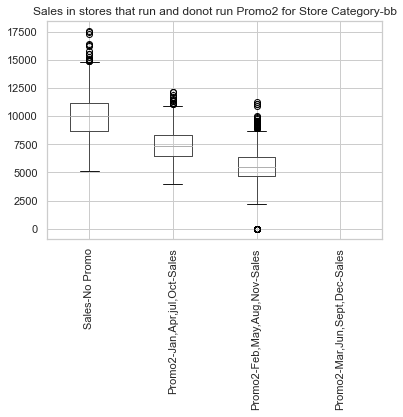

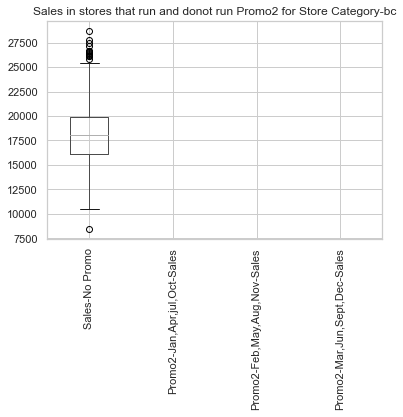

In [79]:
for i in cat_list:
    sales_nopromo2_i=main_nopromo2[main_nopromo2['StoreType+Assortment']==i].groupby('Date')['Sales'].mean().reset_index()
    sales_nopromo2_i.columns=['Date','Sales-No Promo']
    sales_promo2_int1=int1_promo2_df[int1_promo2_df['StoreType+Assortment']==i].groupby('Date')['Sales'].mean().reset_index()
    sales_promo2_int2=int2_promo2_df[int2_promo2_df['StoreType+Assortment']==i].groupby('Date')['Sales'].mean().reset_index()
    sales_promo2_int3=int3_promo2_df[int3_promo2_df['StoreType+Assortment']==i].groupby('Date')['Sales'].mean().reset_index()
    sales_nopromo2_i['Promo2-Jan,Apr,jul,Oct-Sales']=sales_promo2_int1['Sales']
    sales_nopromo2_i['Promo2-Feb,May,Aug,Nov-Sales']=sales_promo2_int2['Sales']
    sales_nopromo2_i['Promo2-Mar,Jun,Sept,Dec-Sales']=sales_promo2_int3['Sales']
    sales_nopromo2_i.boxplot(column=['Sales-No Promo','Promo2-Jan,Apr,jul,Oct-Sales','Promo2-Feb,May,Aug,Nov-Sales','Promo2-Mar,Jun,Sept,Dec-Sales'])
    plt.xticks(rotation=90)
    plt.title('Sales in stores that run and donot run Promo2 for Store Category-'+str(i))
    plt.show()

    
    

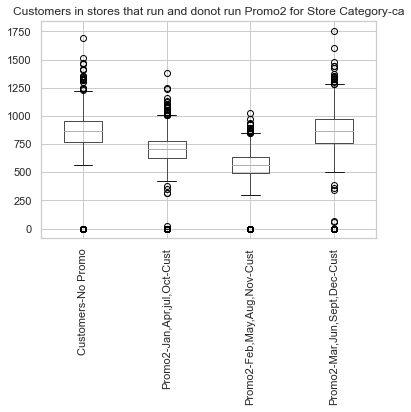

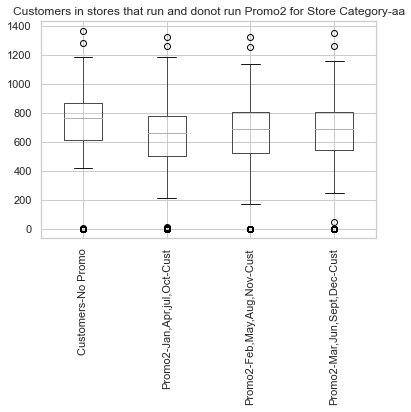

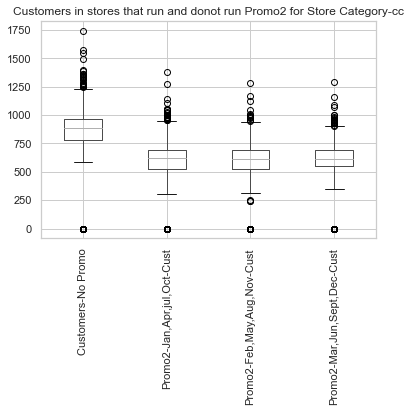

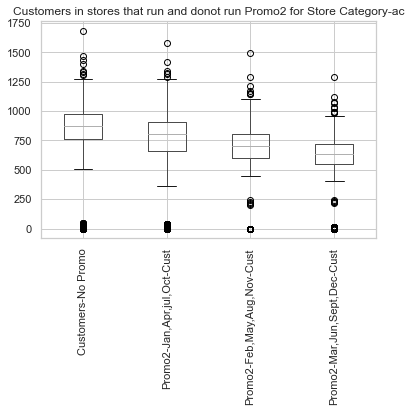

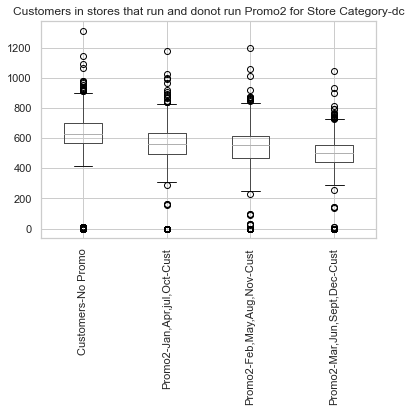

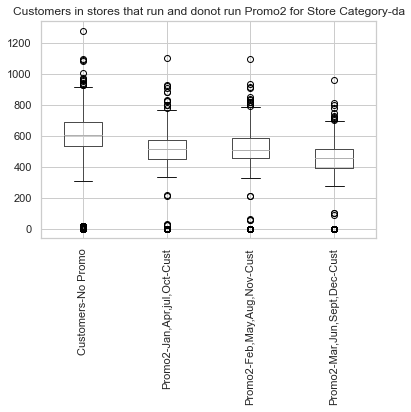

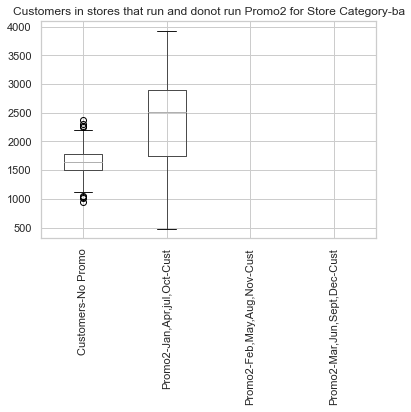

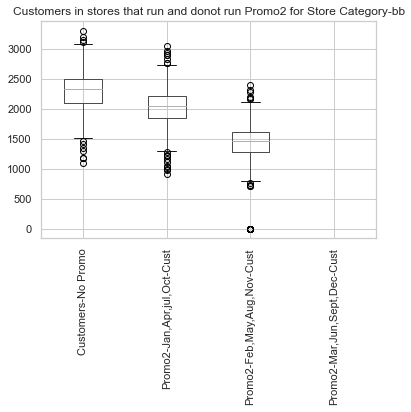

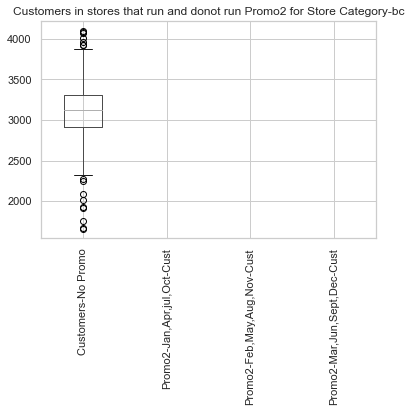

In [80]:
for i in cat_list:
    cust_nopromo2_i=main_nopromo2[main_nopromo2['StoreType+Assortment']==i].groupby('Date')['Customers'].mean().reset_index()
    cust_nopromo2_i.columns=['Date','Customers-No Promo']
    cust_promo2_int1=int1_promo2_df[int1_promo2_df['StoreType+Assortment']==i].groupby('Date')['Customers'].mean().reset_index()
    cust_promo2_int2=int2_promo2_df[int2_promo2_df['StoreType+Assortment']==i].groupby('Date')['Customers'].mean().reset_index()
    cust_promo2_int3=int3_promo2_df[int3_promo2_df['StoreType+Assortment']==i].groupby('Date')['Customers'].mean().reset_index()
    cust_nopromo2_i['Promo2-Jan,Apr,jul,Oct-Cust']=cust_promo2_int1['Customers']
    cust_nopromo2_i['Promo2-Feb,May,Aug,Nov-Cust']=cust_promo2_int2['Customers']
    cust_nopromo2_i['Promo2-Mar,Jun,Sept,Dec-Cust']=cust_promo2_int3['Customers']
    cust_nopromo2_i.boxplot(column=['Customers-No Promo','Promo2-Jan,Apr,jul,Oct-Cust','Promo2-Feb,May,Aug,Nov-Cust','Promo2-Mar,Jun,Sept,Dec-Cust'])
    plt.xticks(rotation=90)
    plt.title('Customers in stores that run and donot run Promo2 for Store Category-'+str(i))
    plt.show()

    
    

**At a cummulative level, in the months when these promos are run as well, the stores that run these promos return a lower average sales than those that dont-across all three promo intervals**

**When we did this analysis at the store category level, we found that in Store Category BA ,stores that run promo2 generate higher salesand Customer walk-ins than stores that dont-in the case of all three promo intervals-in the months that these promos are run in**

**Promo2 has worked as a marketing strategy in store category-BA and has delivered tangible business results**

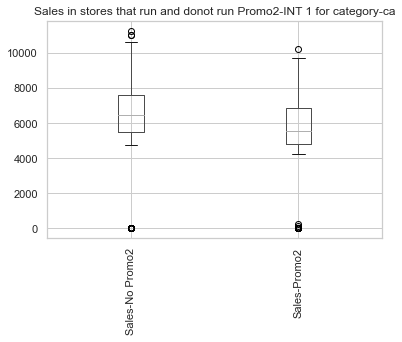

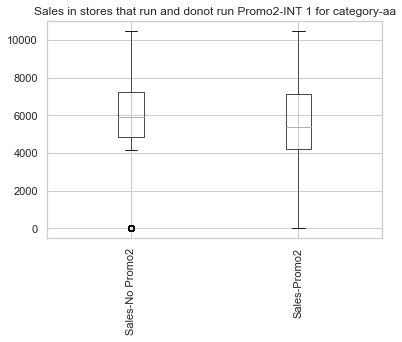

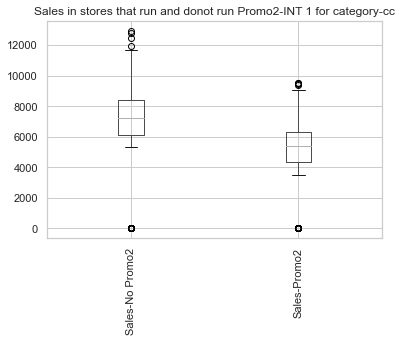

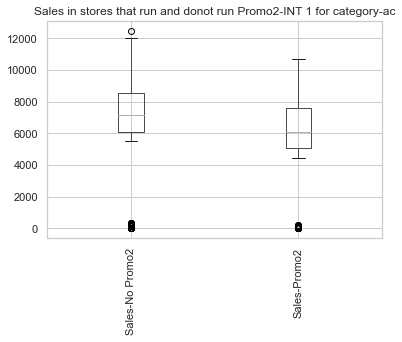

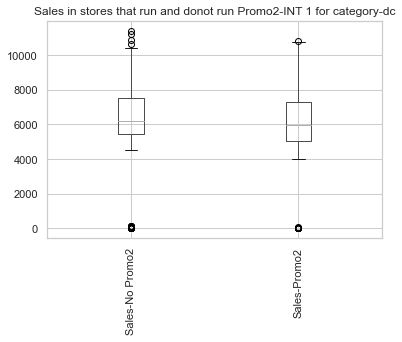

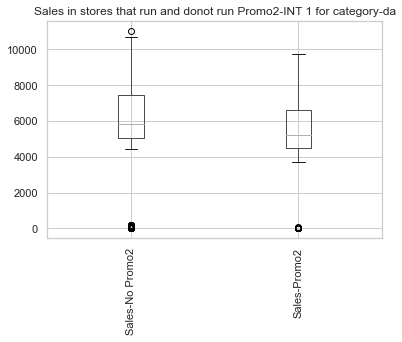

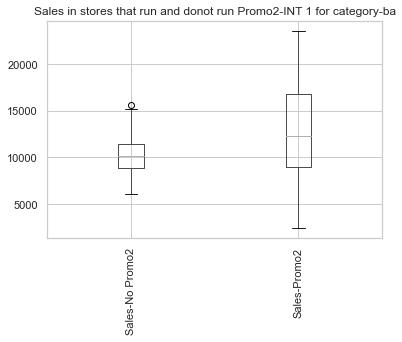

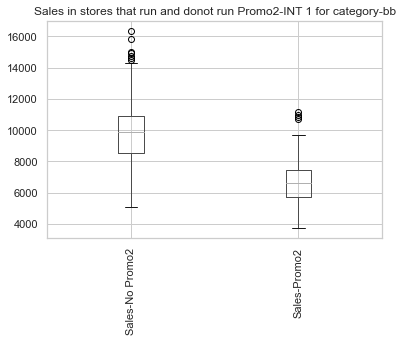

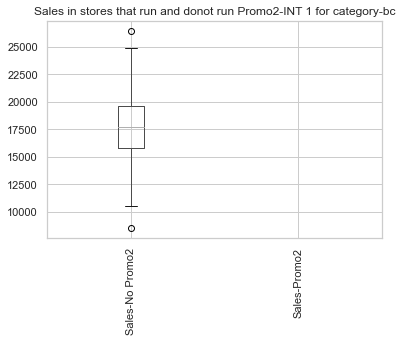

In [81]:
for i in cat_list:
    cat_promo2=main_promo2[main_promo2['StoreType+Assortment']==i]
    cat_promo2_int1=cat_promo2[cat_promo2['Month of Sale'].isin(int1_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_promo2_int1.columns=['Date','Sales-Promo2']
    cat_nopromo2=main_nopromo2[main_nopromo2['StoreType+Assortment']==i]
    cat_nopromo2_int1=cat_nopromo2[cat_nopromo2['Month of Sale'].isin(int1_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_nopromo2_int1.columns=['Date','Sales-No Promo2']
    cat_promo2_int1['Sales-No Promo2']=cat_nopromo2_int1['Sales-No Promo2']
    cat_promo2_int1.boxplot(column=['Sales-No Promo2','Sales-Promo2'])
    plt.xticks(rotation=90)
    plt.title('Sales in stores that run and donot run Promo2-INT 1 for category-'+str(i))
    plt.show()


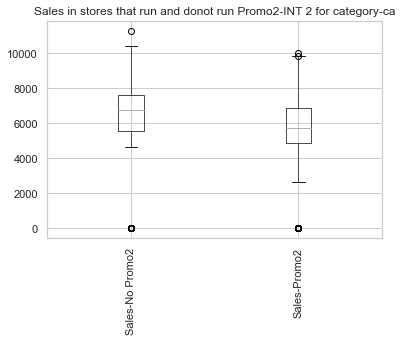

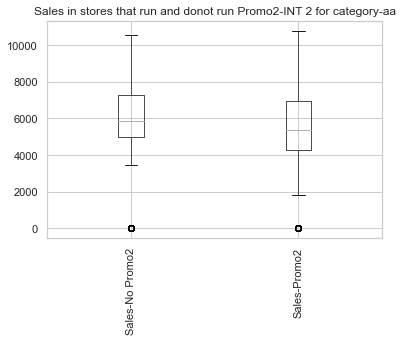

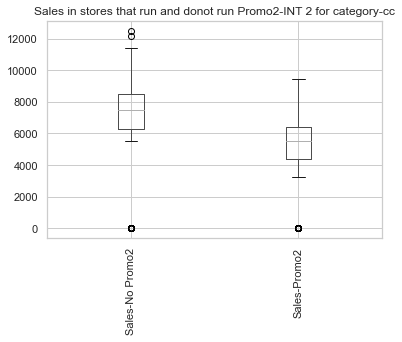

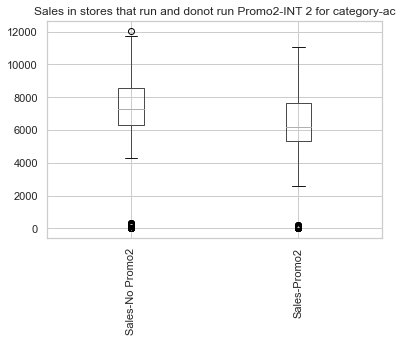

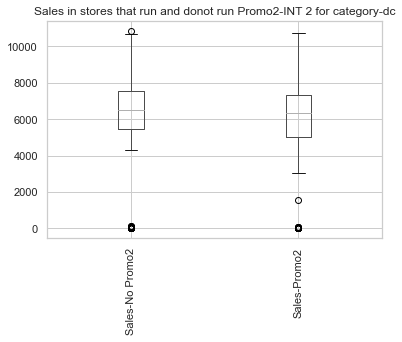

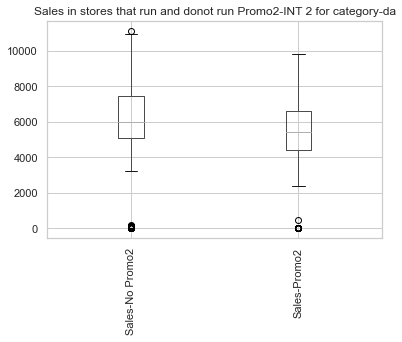

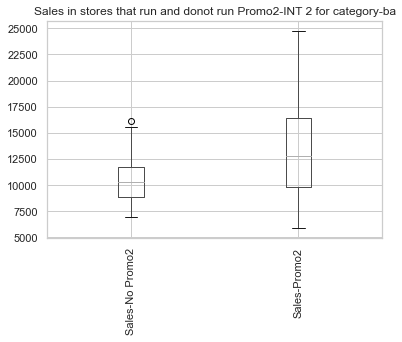

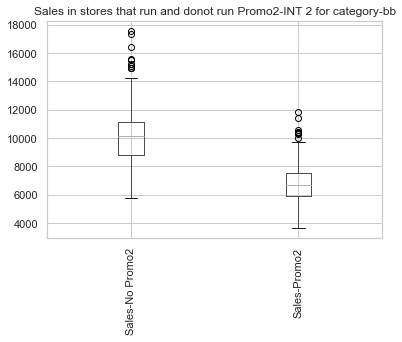

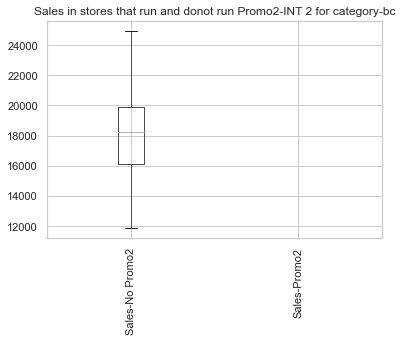

In [82]:
for i in cat_list:
    cat_promo2=main_promo2[main_promo2['StoreType+Assortment']==i]
    cat_promo2_int2=cat_promo2[cat_promo2['Month of Sale'].isin(int2_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_promo2_int2.columns=['Date','Sales-Promo2']
    cat_nopromo2=main_nopromo2[main_nopromo2['StoreType+Assortment']==i]
    cat_nopromo2_int2=cat_nopromo2[cat_nopromo2['Month of Sale'].isin(int2_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_nopromo2_int2.columns=['Date','Sales-No Promo2']
    cat_promo2_int2['Sales-No Promo2']=cat_nopromo2_int2['Sales-No Promo2']
    cat_promo2_int2.boxplot(column=['Sales-No Promo2','Sales-Promo2'])
    plt.xticks(rotation=90)
    plt.title('Sales in stores that run and donot run Promo2-INT 2 for category-'+str(i))
    plt.show()


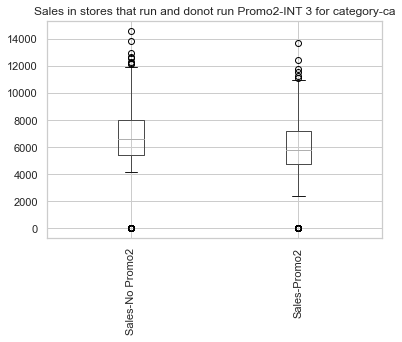

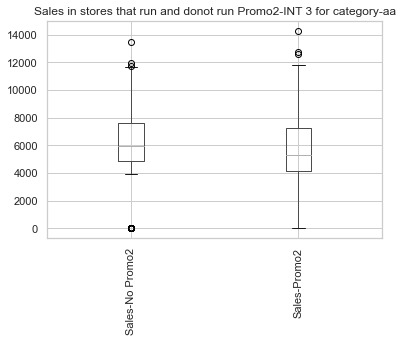

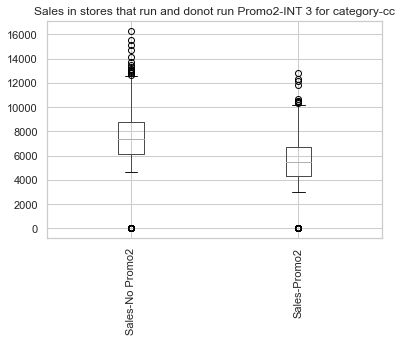

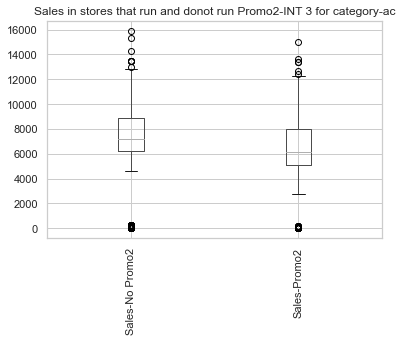

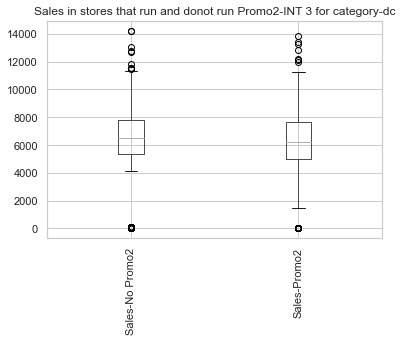

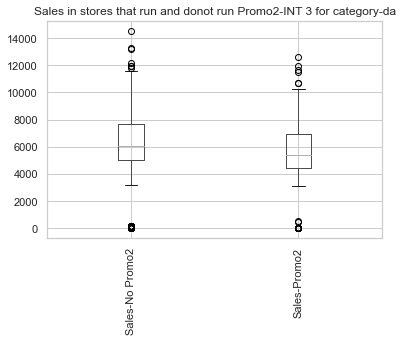

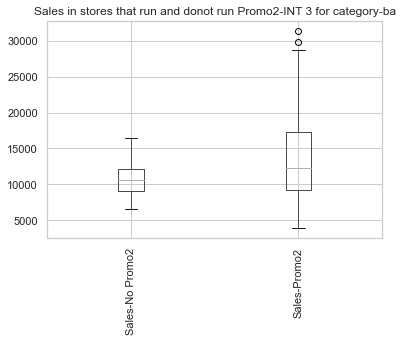

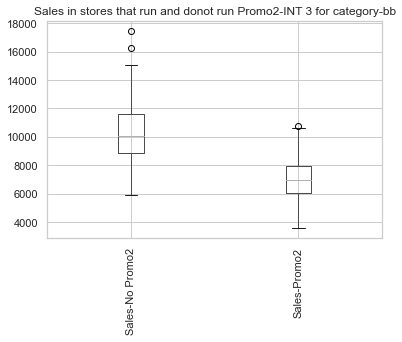

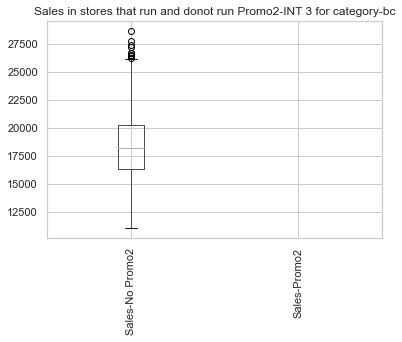

In [83]:
for i in cat_list:
    cat_promo2=main_promo2[main_promo2['StoreType+Assortment']==i]
    cat_promo2_int3=cat_promo2[cat_promo2['Month of Sale'].isin(int3_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_promo2_int3.columns=['Date','Sales-Promo2']
    cat_nopromo2=main_nopromo2[main_nopromo2['StoreType+Assortment']==i]
    cat_nopromo2_int3=cat_nopromo2[cat_nopromo2['Month of Sale'].isin(int3_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_nopromo2_int3.columns=['Date','Sales-No Promo2']
    cat_promo2_int3['Sales-No Promo2']=cat_nopromo2_int3['Sales-No Promo2']
    cat_promo2_int3.boxplot(column=['Sales-No Promo2','Sales-Promo2'])
    plt.xticks(rotation=90)
    plt.title('Sales in stores that run and donot run Promo2-INT 3 for category-'+str(i))
    plt.show()


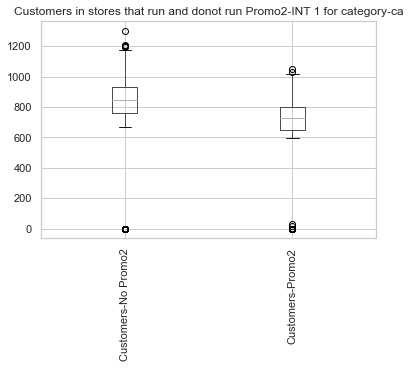

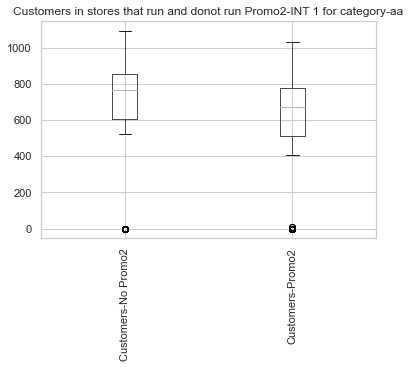

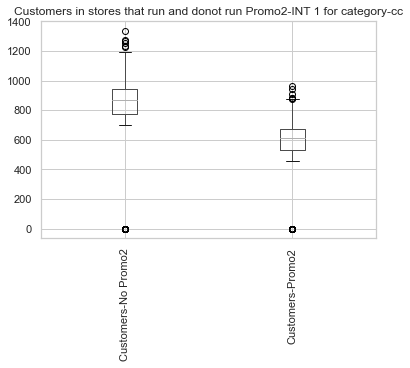

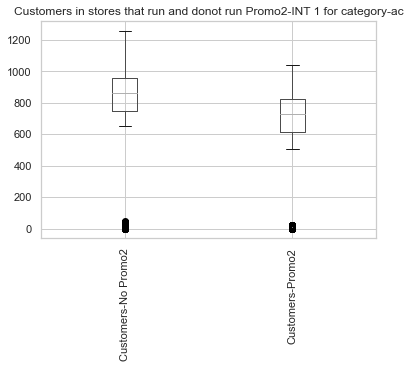

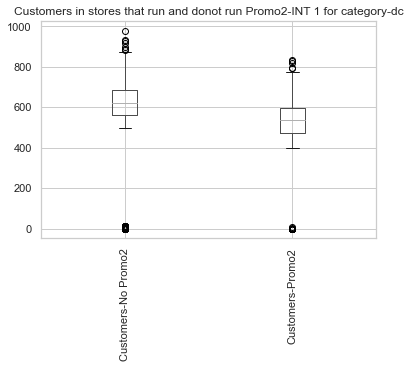

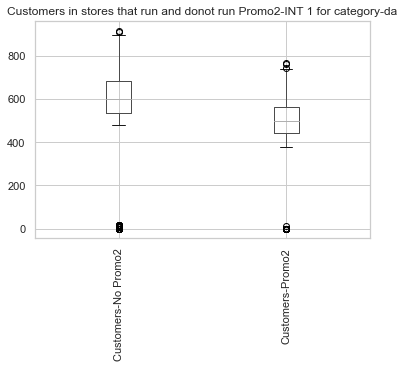

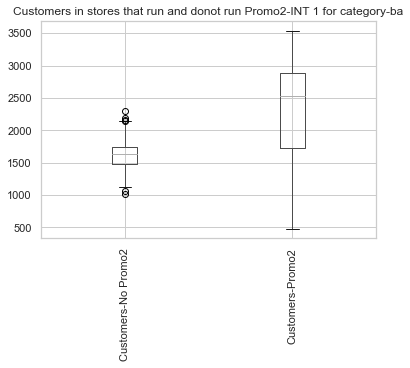

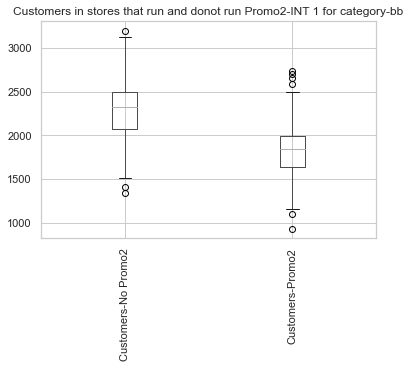

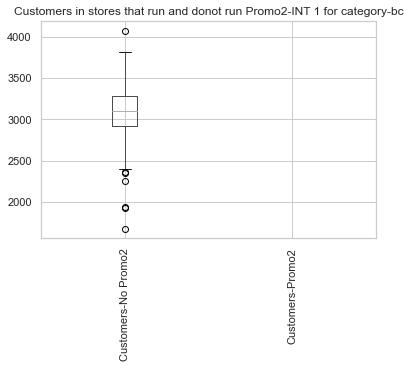

In [84]:
for i in cat_list:
    cat_promo2=main_promo2[main_promo2['StoreType+Assortment']==i]
    cat_promo2_int1=cat_promo2[cat_promo2['Month of Sale'].isin(int1_month)].groupby('Date')['Customers'].mean().reset_index()
    cat_promo2_int1.columns=['Date','Customers-Promo2']
    cat_nopromo2=main_nopromo2[main_nopromo2['StoreType+Assortment']==i]
    cat_nopromo2_int1=cat_nopromo2[cat_nopromo2['Month of Sale'].isin(int1_month)].groupby('Date')['Customers'].mean().reset_index()
    cat_nopromo2_int1.columns=['Date','Customers-No Promo2']
    cat_promo2_int1['Customers-No Promo2']=cat_nopromo2_int1['Customers-No Promo2']
    cat_promo2_int1.boxplot(column=['Customers-No Promo2','Customers-Promo2'])
    plt.xticks(rotation=90)
    plt.title('Customers in stores that run and donot run Promo2-INT 1 for category-'+str(i))
    plt.show()


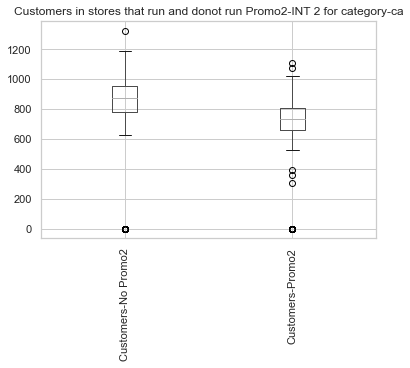

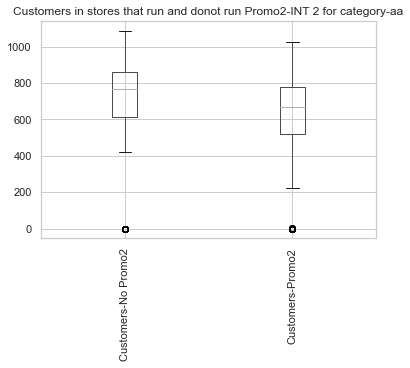

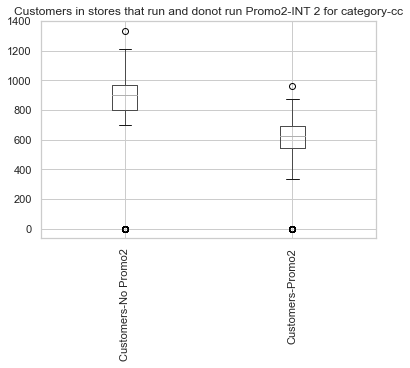

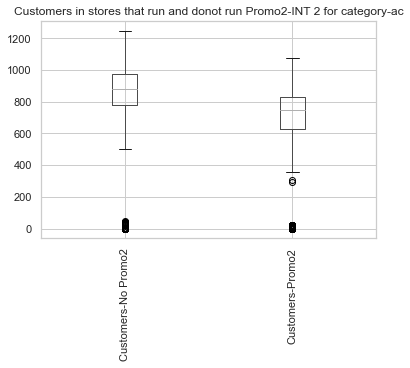

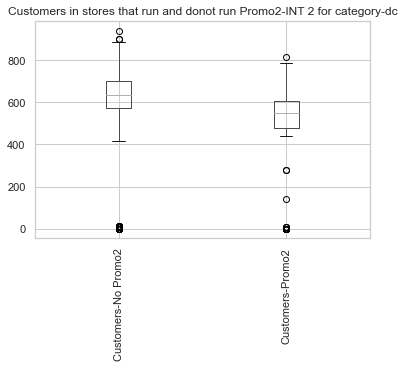

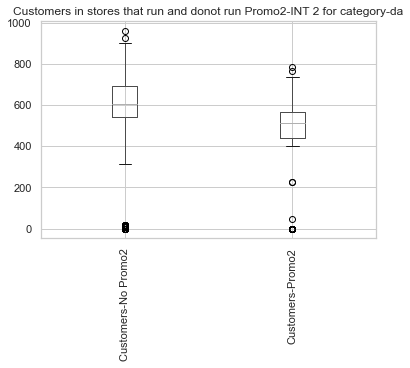

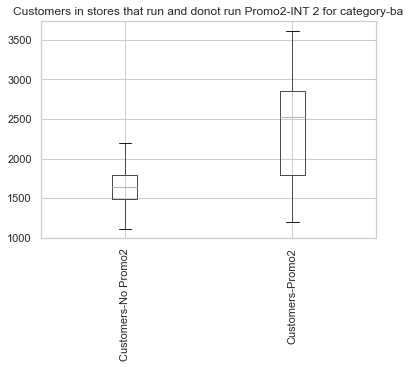

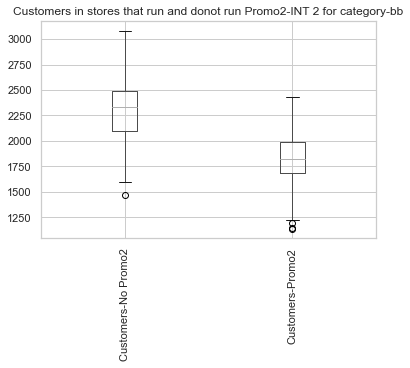

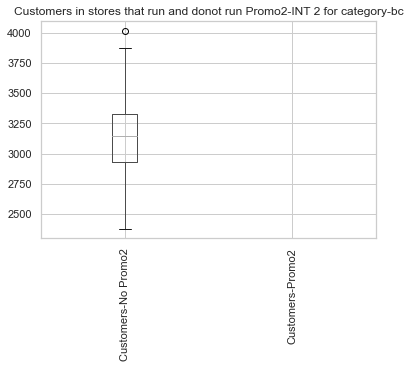

In [85]:
for i in cat_list:
    cat_promo2=main_promo2[main_promo2['StoreType+Assortment']==i]
    cat_promo2_int2=cat_promo2[cat_promo2['Month of Sale'].isin(int2_month)].groupby('Date')['Customers'].mean().reset_index()
    cat_promo2_int2.columns=['Date','Customers-Promo2']
    cat_nopromo2=main_nopromo2[main_nopromo2['StoreType+Assortment']==i]
    cat_nopromo2_int2=cat_nopromo2[cat_nopromo2['Month of Sale'].isin(int2_month)].groupby('Date')['Customers'].mean().reset_index()
    cat_nopromo2_int2.columns=['Date','Customers-No Promo2']
    cat_promo2_int2['Customers-No Promo2']=cat_nopromo2_int2['Customers-No Promo2']
    cat_promo2_int2.boxplot(column=['Customers-No Promo2','Customers-Promo2'])
    plt.xticks(rotation=90)
    plt.title('Customers in stores that run and donot run Promo2-INT 2 for category-'+str(i))
    plt.show()


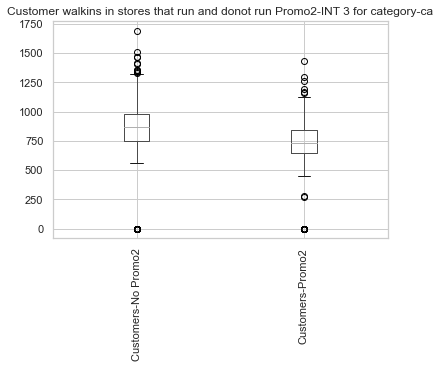

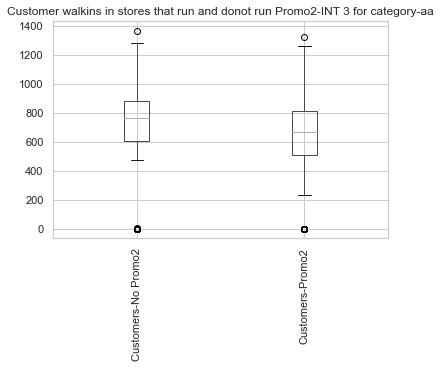

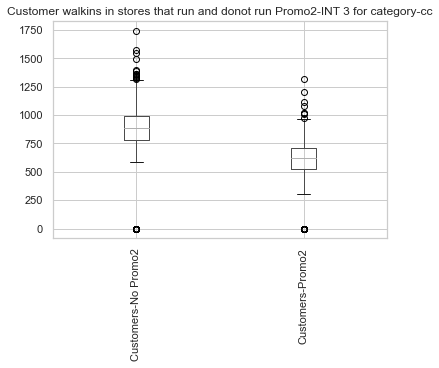

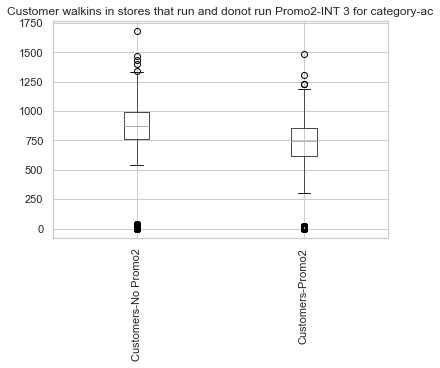

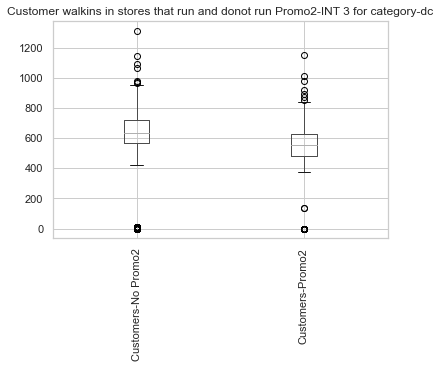

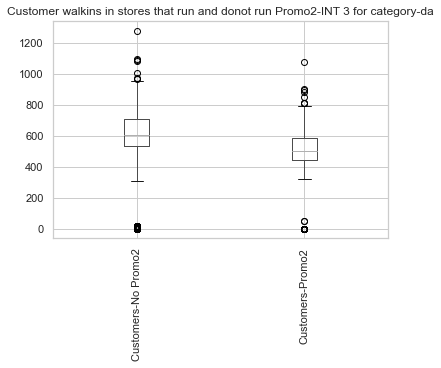

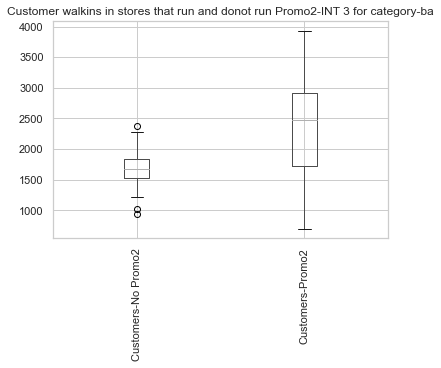

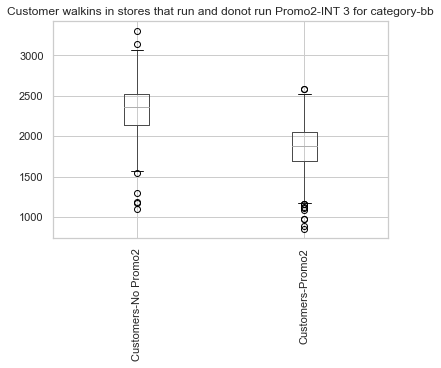

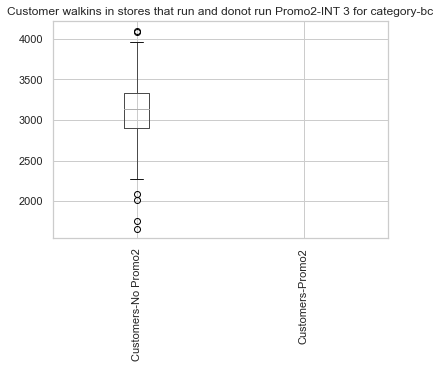

In [86]:
for i in cat_list:
    cat_promo2=main_promo2[main_promo2['StoreType+Assortment']==i]
    cat_promo2_int3=cat_promo2[cat_promo2['Month of Sale'].isin(int3_month)].groupby('Date')['Customers'].mean().reset_index()
    cat_promo2_int3.columns=['Date','Customers-Promo2']
    cat_nopromo2=main_nopromo2[main_nopromo2['StoreType+Assortment']==i]
    cat_nopromo2_int3=cat_nopromo2[cat_nopromo2['Month of Sale'].isin(int3_month)].groupby('Date')['Customers'].mean().reset_index()
    cat_nopromo2_int3.columns=['Date','Customers-No Promo2']
    cat_promo2_int3['Customers-No Promo2']=cat_nopromo2_int3['Customers-No Promo2']
    cat_promo2_int3.boxplot(column=['Customers-No Promo2','Customers-Promo2'])
    plt.xticks(rotation=90)
    plt.title('Customer walkins in stores that run and donot run Promo2-INT 3 for category-'+str(i))
    plt.show()


**For stores that run promo 2, There is no significant change in Customer walkins and Sales between months when promo2 is run and months when it is not-the exception to this is sales in the case of Int 2 and Int 3**

**When this exercise was repeated for each individual store category, we found that in most cases,the average sales were pretty much the same in months when the promo2 was run and months when it was not-except for the case of Store category BB IN PROMO Intervals 1 and 2**

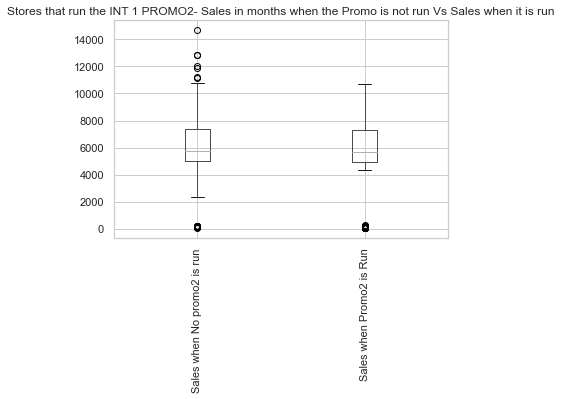

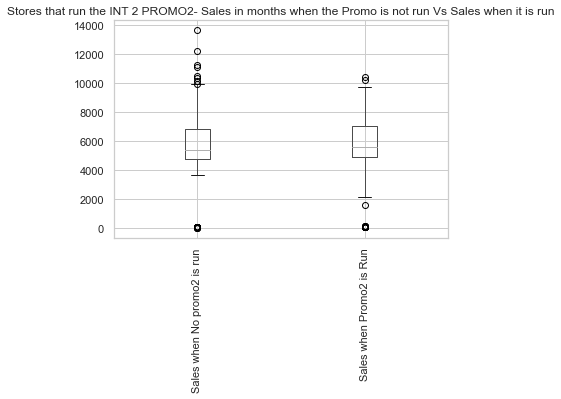

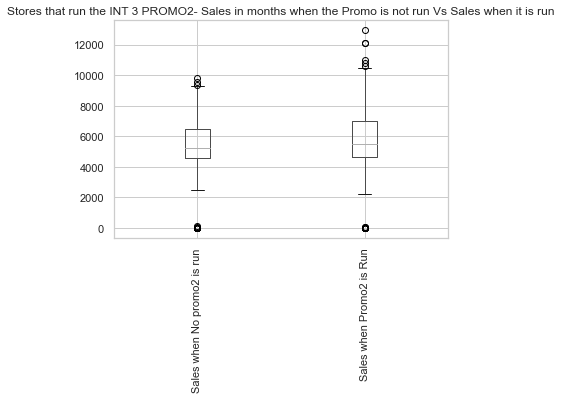

In [87]:
int1_promomonths=int1_promo2_df[int1_promo2_df['Month of Sale'].isin(int1_month)].groupby('Date')['Sales'].mean().reset_index()
int1_promomonths.columns=['Date','Sales when Promo2 is Run']
int1_nopromomonths=int1_promo2_df[~int1_promo2_df['Month of Sale'].isin(int1_month)].groupby('Date')['Sales'].mean().reset_index()
int1_promomonths['Sales when No promo2 is run']=int1_nopromomonths['Sales']

int2_promomonths=int2_promo2_df[int2_promo2_df['Month of Sale'].isin(int2_month)].groupby('Date')['Sales'].mean().reset_index()
int2_promomonths.columns=['Date','Sales when Promo2 is Run']
int2_nopromomonths=int2_promo2_df[~int2_promo2_df['Month of Sale'].isin(int2_month)].groupby('Date')['Sales'].mean().reset_index()
int2_promomonths['Sales when No promo2 is run']=int2_nopromomonths['Sales']

int3_promomonths=int3_promo2_df[int3_promo2_df['Month of Sale'].isin(int3_month)].groupby('Date')['Sales'].mean().reset_index()
int3_promomonths.columns=['Date','Sales when Promo2 is Run']
int3_nopromomonths=int3_promo2_df[~int3_promo2_df['Month of Sale'].isin(int3_month)].groupby('Date')['Sales'].mean().reset_index()
int3_promomonths['Sales when No promo2 is run']=int3_nopromomonths['Sales']

int1_promomonths.boxplot(column=['Sales when No promo2 is run','Sales when Promo2 is Run'])
plt.xticks(rotation=90)
plt.title('Stores that run the INT 1 PROMO2- Sales in months when the Promo is not run Vs Sales when it is run')
plt.show()


int2_promomonths.boxplot(column=['Sales when No promo2 is run','Sales when Promo2 is Run'])
plt.xticks(rotation=90)
plt.title('Stores that run the INT 2 PROMO2- Sales in months when the Promo is not run Vs Sales when it is run')
plt.show()


int3_promomonths.boxplot(column=['Sales when No promo2 is run','Sales when Promo2 is Run'])
plt.xticks(rotation=90)
plt.title('Stores that run the INT 3 PROMO2- Sales in months when the Promo is not run Vs Sales when it is run')
plt.show()




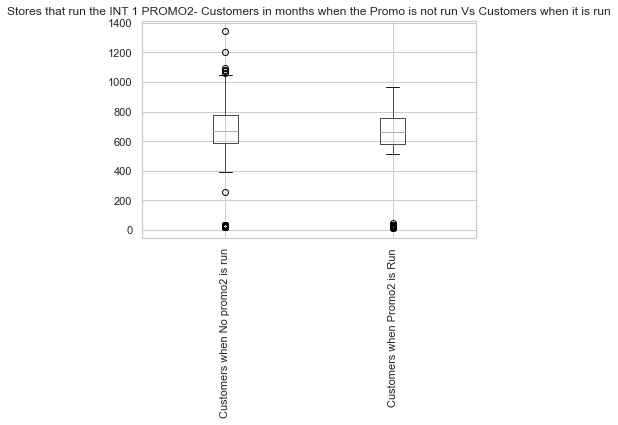

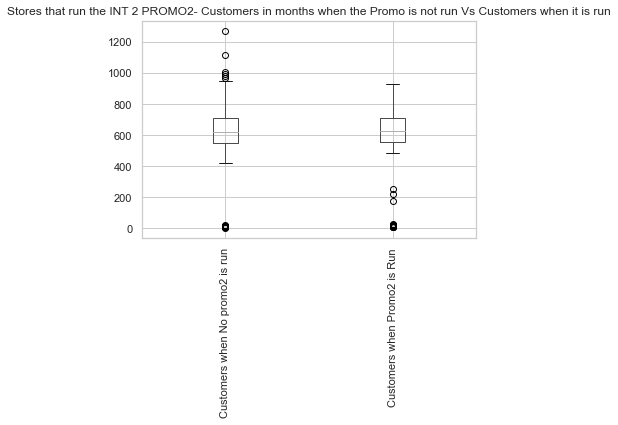

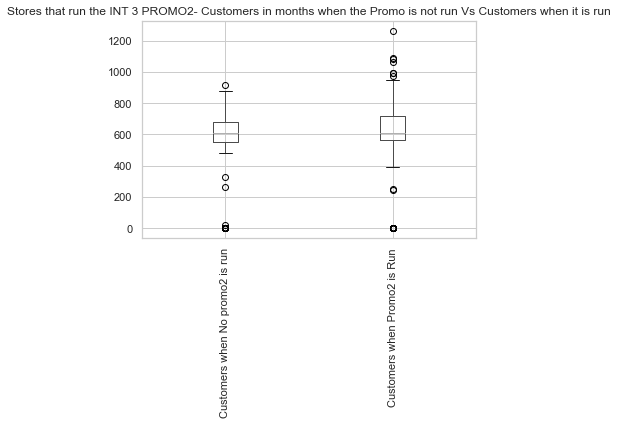

In [88]:
int1_promomonths_cust=int1_promo2_df[int1_promo2_df['Month of Sale'].isin(int1_month)].groupby('Date')['Customers'].mean().reset_index()
int1_promomonths_cust.columns=['Date','Customers when Promo2 is Run']
int1_nopromomonths_cust=int1_promo2_df[~int1_promo2_df['Month of Sale'].isin(int1_month)].groupby('Date')['Customers'].mean().reset_index()
int1_promomonths_cust['Customers when No promo2 is run']=int1_nopromomonths_cust['Customers']

int2_promomonths_cust=int2_promo2_df[int2_promo2_df['Month of Sale'].isin(int2_month)].groupby('Date')['Customers'].mean().reset_index()
int2_promomonths_cust.columns=['Date','Customers when Promo2 is Run']
int2_nopromomonths_cust=int2_promo2_df[~int2_promo2_df['Month of Sale'].isin(int2_month)].groupby('Date')['Customers'].mean().reset_index()
int2_promomonths_cust['Customers when No promo2 is run']=int2_nopromomonths_cust['Customers']

int3_promomonths_cust=int3_promo2_df[int3_promo2_df['Month of Sale'].isin(int3_month)].groupby('Date')['Customers'].mean().reset_index()
int3_promomonths_cust.columns=['Date','Customers when Promo2 is Run']
int3_nopromomonths_cust=int3_promo2_df[~int3_promo2_df['Month of Sale'].isin(int3_month)].groupby('Date')['Customers'].mean().reset_index()
int3_promomonths_cust['Customers when No promo2 is run']=int3_nopromomonths_cust['Customers']

int1_promomonths_cust.boxplot(column=['Customers when No promo2 is run','Customers when Promo2 is Run'])
plt.xticks(rotation=90)
plt.title('Stores that run the INT 1 PROMO2- Customers in months when the Promo is not run Vs Customers when it is run')
plt.show()


int2_promomonths_cust.boxplot(column=['Customers when No promo2 is run','Customers when Promo2 is Run'])
plt.xticks(rotation=90)
plt.title('Stores that run the INT 2 PROMO2- Customers in months when the Promo is not run Vs Customers when it is run')
plt.show()


int3_promomonths_cust.boxplot(column=['Customers when No promo2 is run','Customers when Promo2 is Run'])
plt.xticks(rotation=90)
plt.title('Stores that run the INT 3 PROMO2- Customers in months when the Promo is not run Vs Customers when it is run')
plt.show()



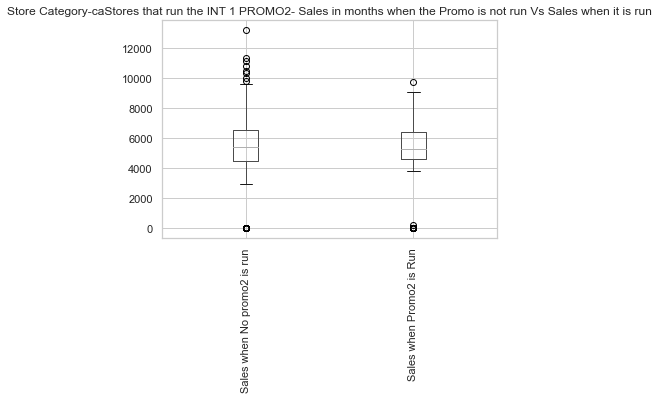

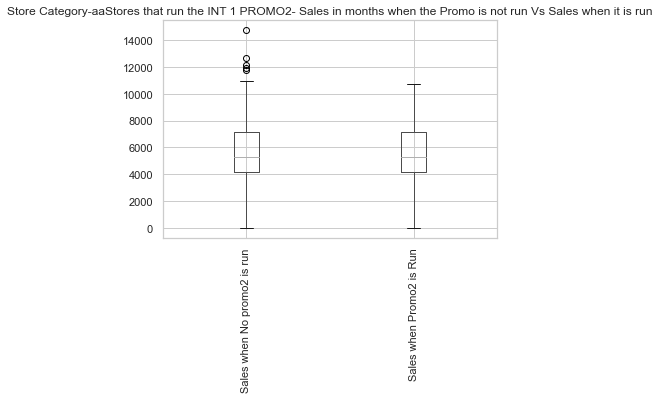

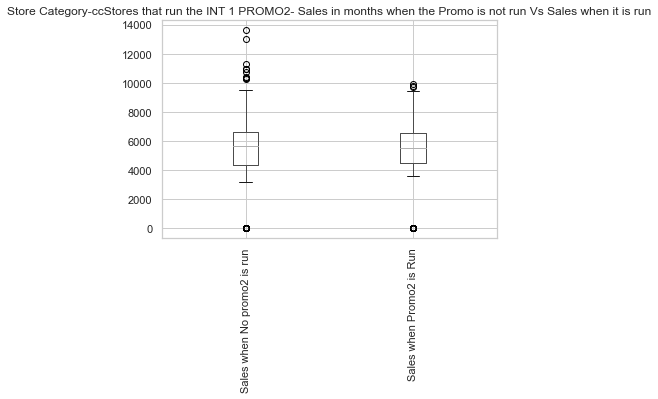

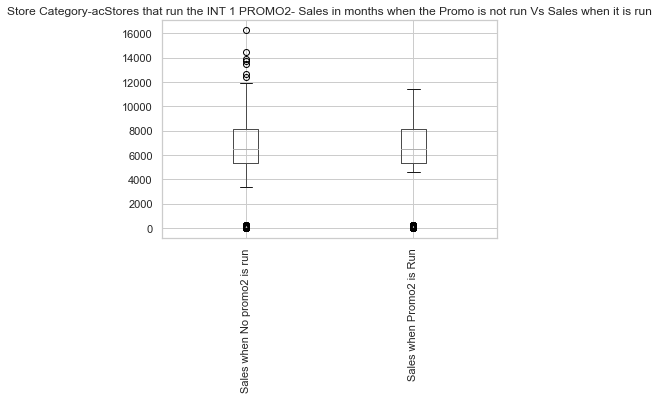

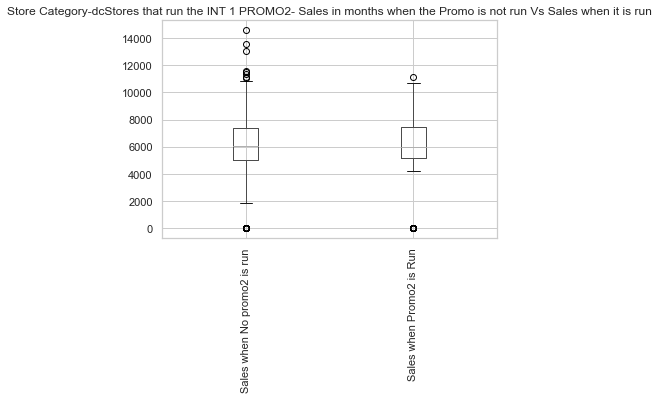

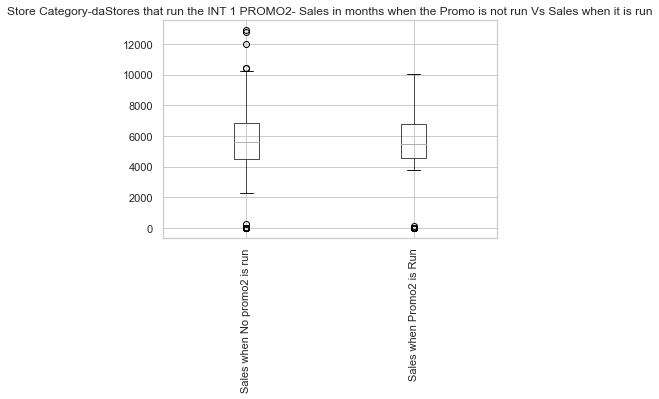

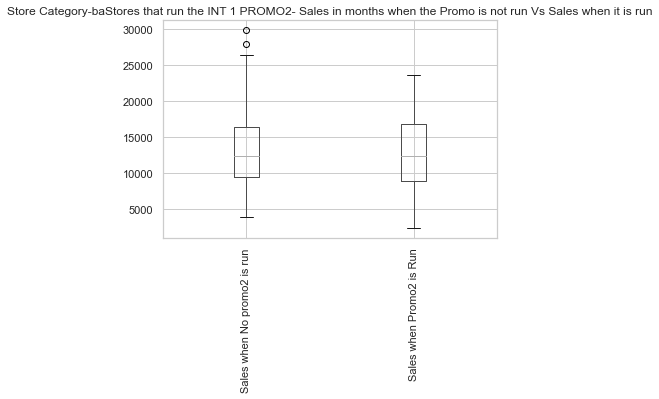

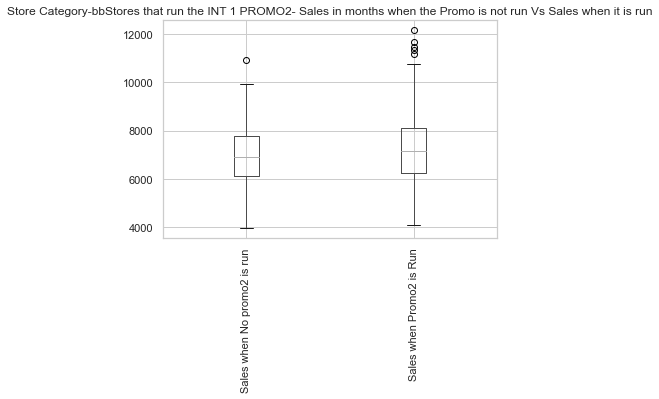

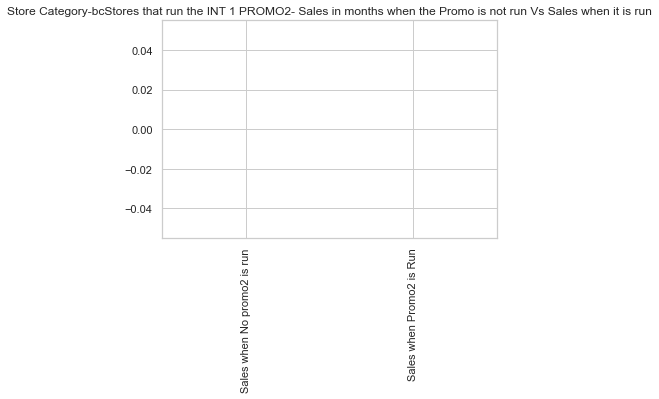

In [89]:
for i in cat_list:
    int1_cat_promo2=int1_promo2_df[int1_promo2_df['StoreType+Assortment']==i]
    cat_int1_promomonths=int1_cat_promo2[int1_cat_promo2['Month of Sale'].isin(int1_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_int1_promomonths.columns=['Date','Sales when Promo2 is Run']
    cat_int1_nopromomonths=int1_cat_promo2[~int1_cat_promo2['Month of Sale'].isin(int1_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_int1_promomonths['Sales when No promo2 is run']=cat_int1_nopromomonths['Sales']
    cat_int1_promomonths.boxplot(column=['Sales when No promo2 is run','Sales when Promo2 is Run'])
    plt.xticks(rotation=90)
    plt.title('Store Category-'+str(i)+'Stores that run the INT 1 PROMO2- Sales in months when the Promo is not run Vs Sales when it is run')
    plt.show()

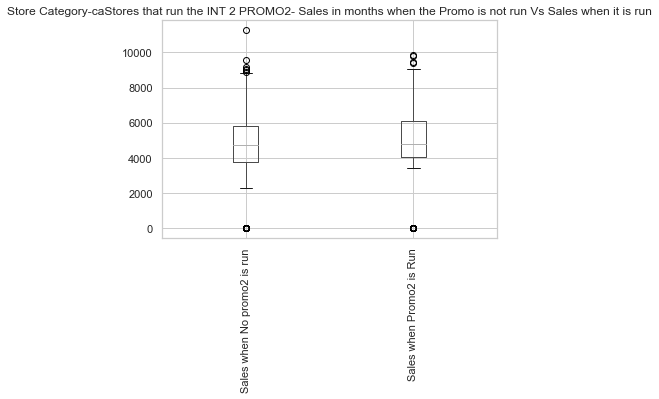

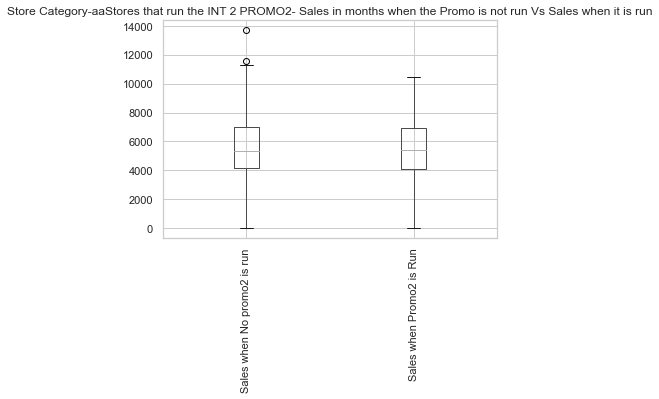

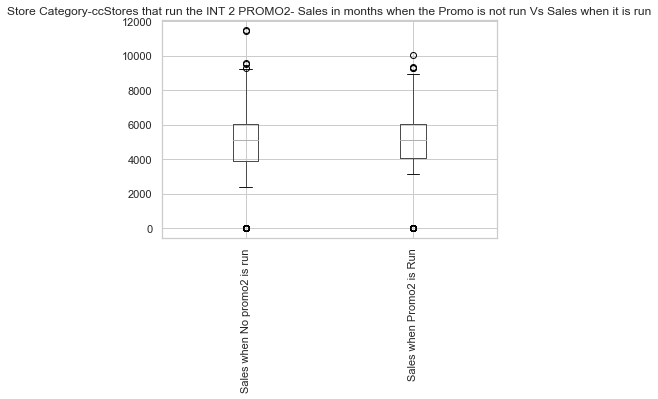

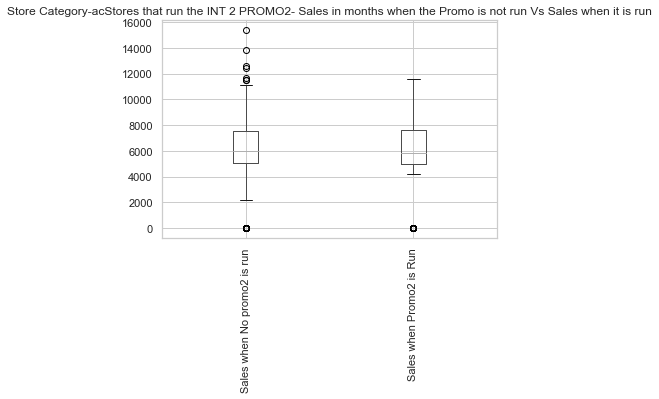

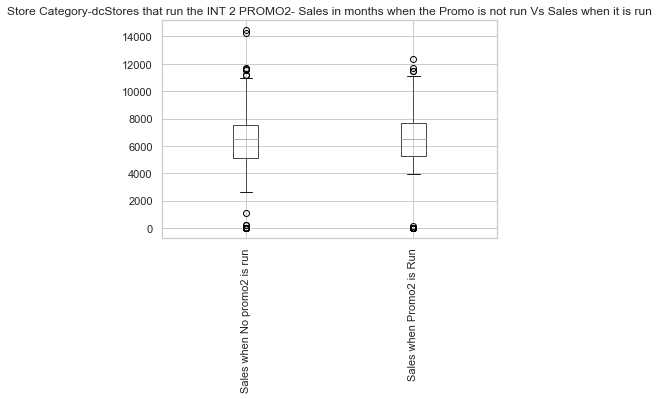

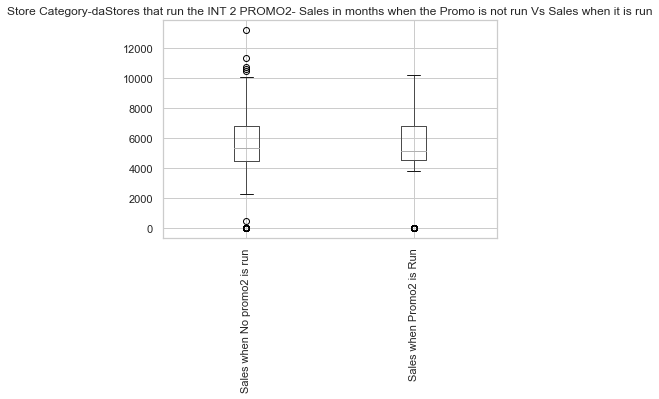

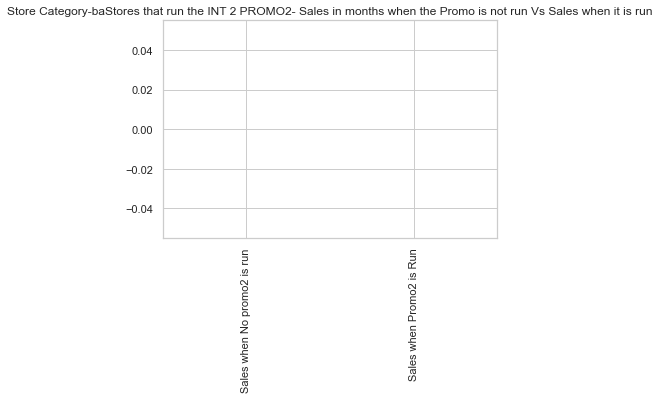

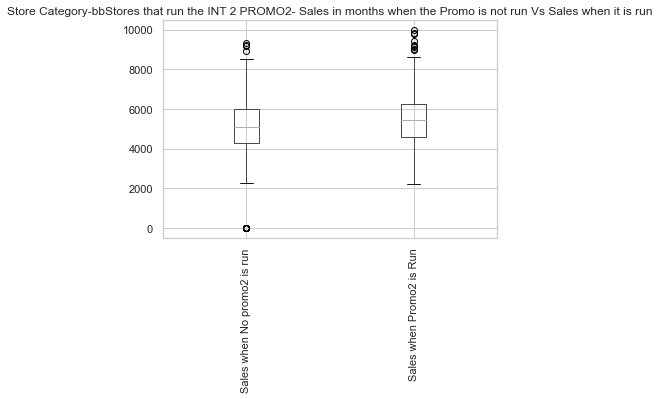

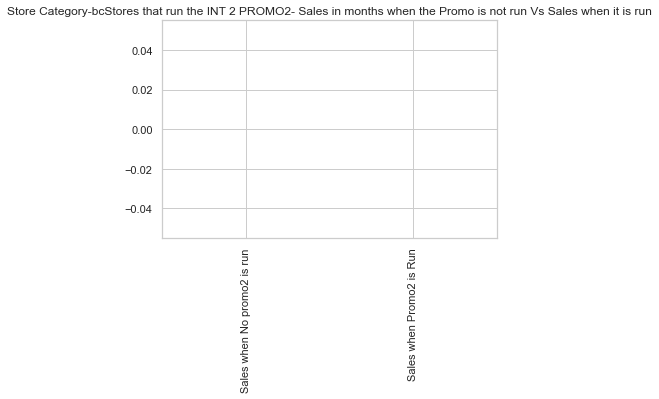

In [90]:
for i in cat_list:
    int2_cat_promo2=int2_promo2_df[int2_promo2_df['StoreType+Assortment']==i]
    cat_int2_promomonths=int2_cat_promo2[int2_cat_promo2['Month of Sale'].isin(int1_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_int2_promomonths.columns=['Date','Sales when Promo2 is Run']
    cat_int2_nopromomonths=int2_cat_promo2[~int2_cat_promo2['Month of Sale'].isin(int1_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_int2_promomonths['Sales when No promo2 is run']=cat_int2_nopromomonths['Sales']
    cat_int2_promomonths.boxplot(column=['Sales when No promo2 is run','Sales when Promo2 is Run'])
    plt.xticks(rotation=90)
    plt.title('Store Category-'+str(i)+'Stores that run the INT 2 PROMO2- Sales in months when the Promo is not run Vs Sales when it is run')
    plt.show()

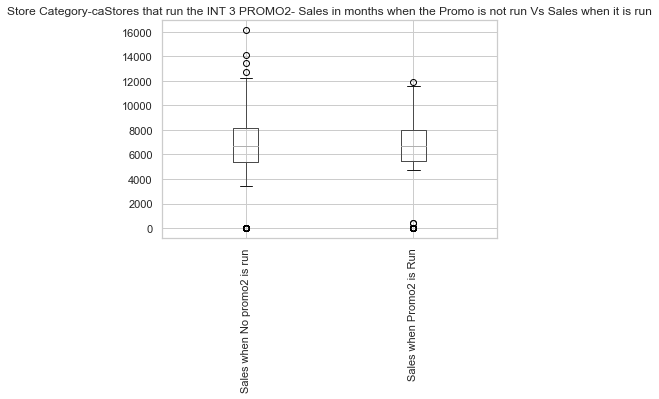

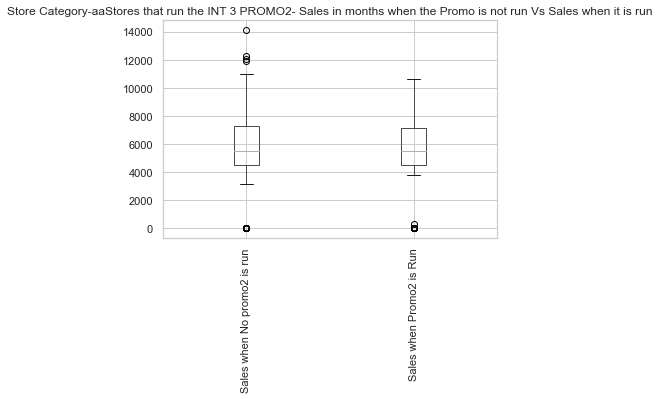

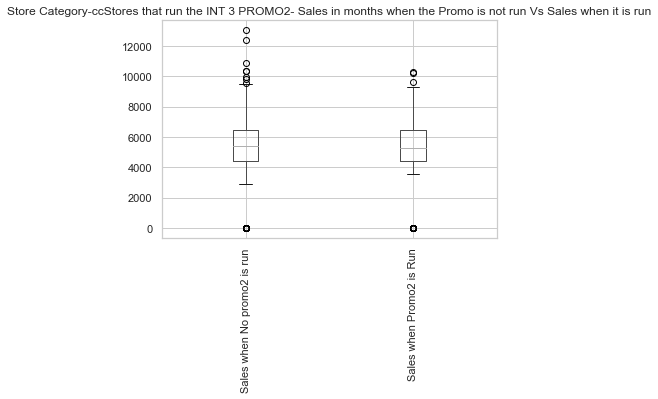

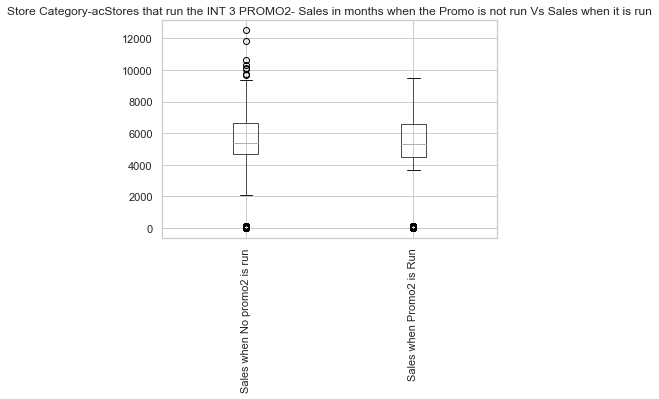

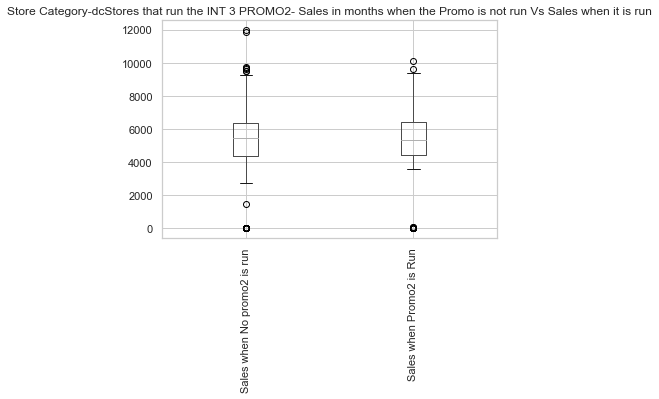

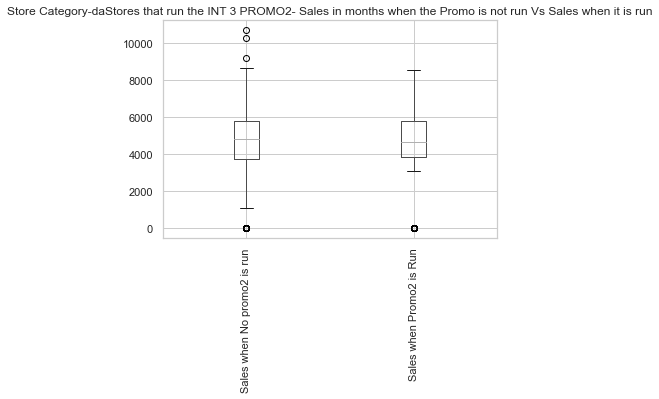

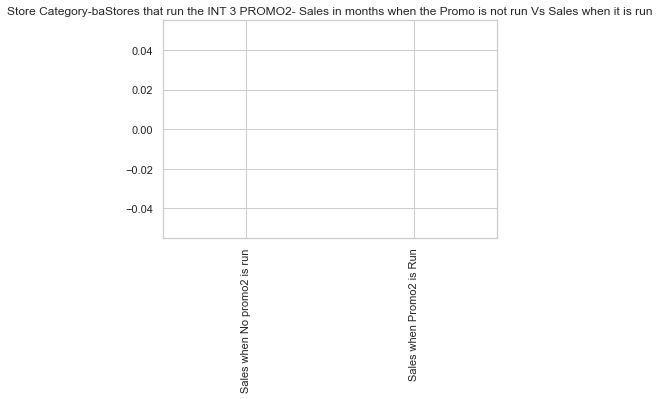

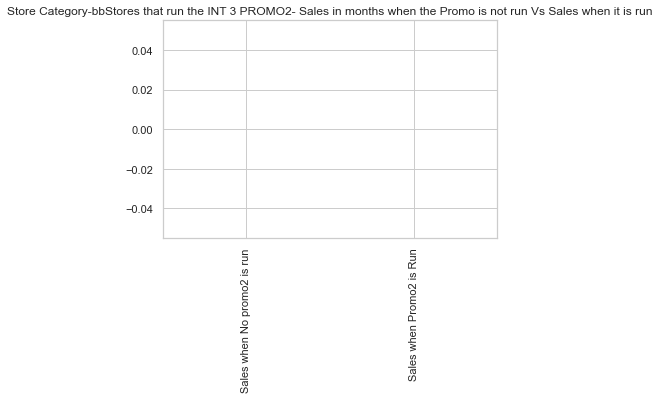

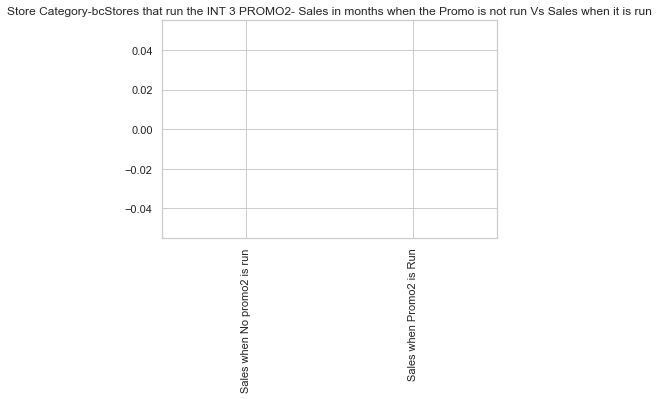

In [91]:
for i in cat_list:
    int3_cat_promo2=int3_promo2_df[int3_promo2_df['StoreType+Assortment']==i]
    cat_int3_promomonths=int3_cat_promo2[int3_cat_promo2['Month of Sale'].isin(int1_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_int3_promomonths.columns=['Date','Sales when Promo2 is Run']
    cat_int3_nopromomonths=int3_cat_promo2[~int3_cat_promo2['Month of Sale'].isin(int1_month)].groupby('Date')['Sales'].mean().reset_index()
    cat_int3_promomonths['Sales when No promo2 is run']=cat_int3_nopromomonths['Sales']
    cat_int3_promomonths.boxplot(column=['Sales when No promo2 is run','Sales when Promo2 is Run'])
    plt.xticks(rotation=90)
    plt.title('Store Category-'+str(i)+'Stores that run the INT 3 PROMO2- Sales in months when the Promo is not run Vs Sales when it is run')
    plt.show()